# Plotting agreement of the subjects over time for the Box the Jet workflow. Sorted by SOL/ HEK event
## Need: subjects_T3.csv
This jupyter notebook plots the results of the Jet or No question, the Jet distribution over the subjects of the reported HEK event  
Since the subjects are shorter than research to the duration of solar jets has shown us, we expect jets appearing in multiple subjects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

%matplotlib inline

Read in the subject files made by make_T3_csvfiles.py  

In [2]:
subjects,obs_time,end_date,ans,agreement,subject_file, subject_sol=np.loadtxt('subjects_{}.csv'.format('T3'),delimiter=',',unpack=True,dtype=str)
obs_time=np.array(obs_time,dtype='datetime64')
end_date=np.array(end_date,dtype='datetime64')
subjects=subjects.astype(int)
agreement=agreement.astype(float)

In [3]:
def make_SOL_folder(SOL_name):
    path = 'SOL/Agreement_{}/'.format(SOL_name)
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("Agreement_{} directory is created".format(SOL_name))
        
        
make_SOL_folder('SOL_T3')

Agreement_SOL_T3 directory is created


0


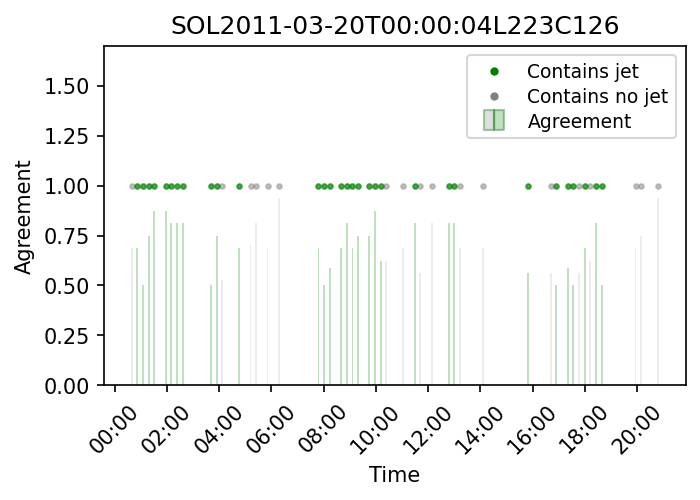

49


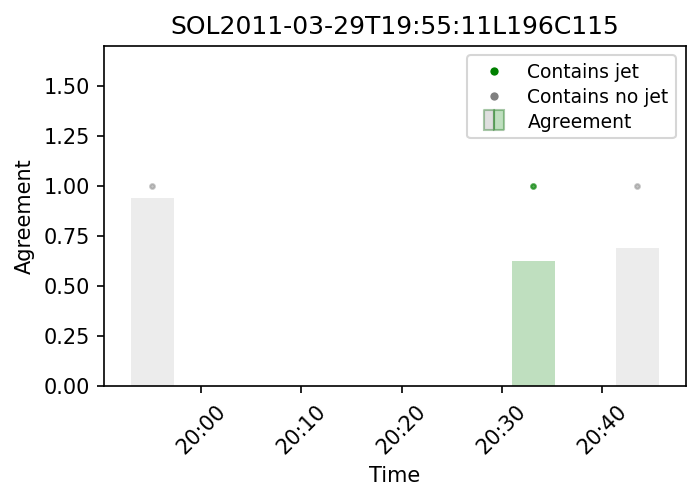

52


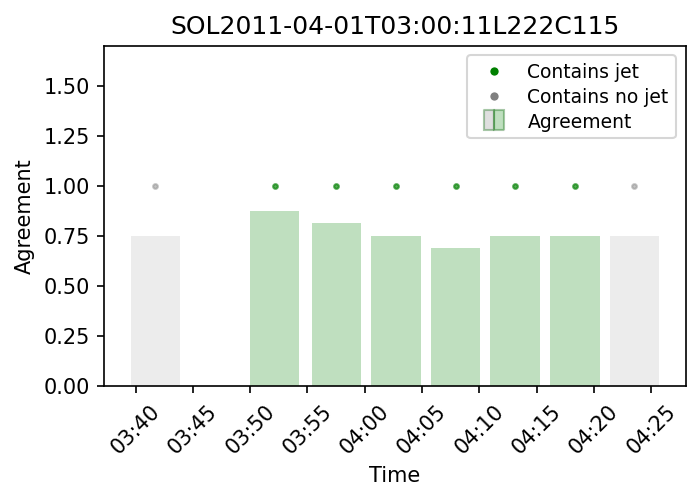

60


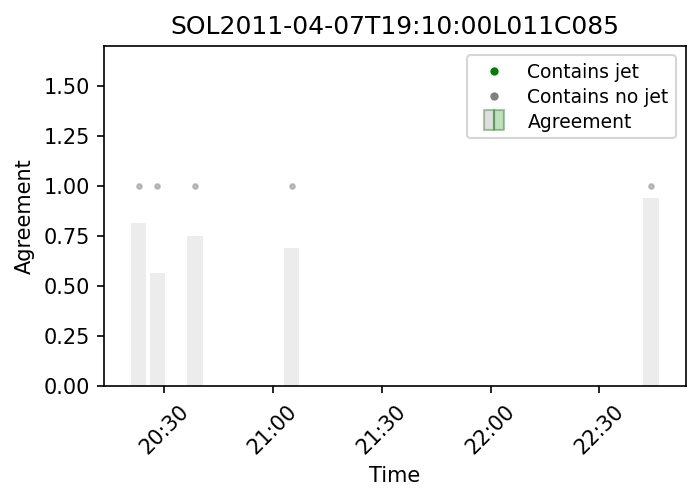

65


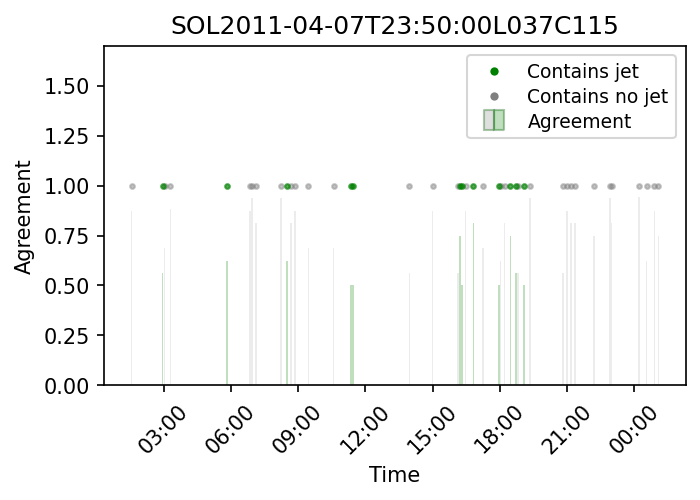

108


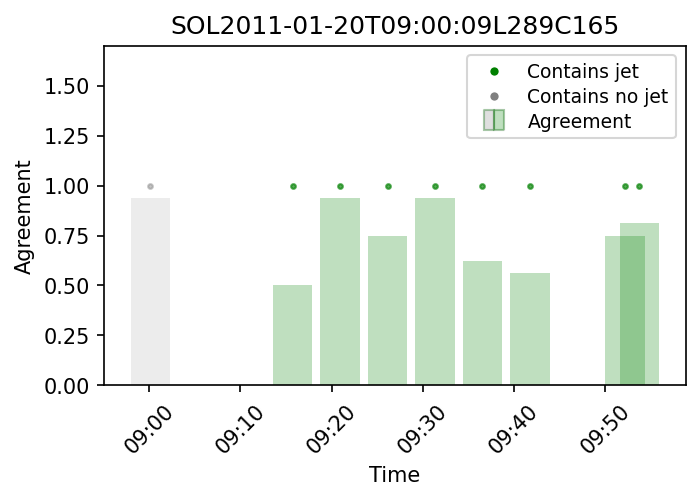

117


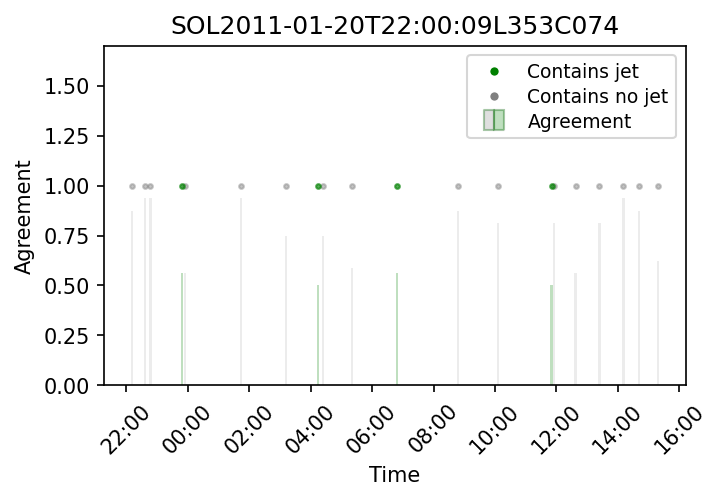

137


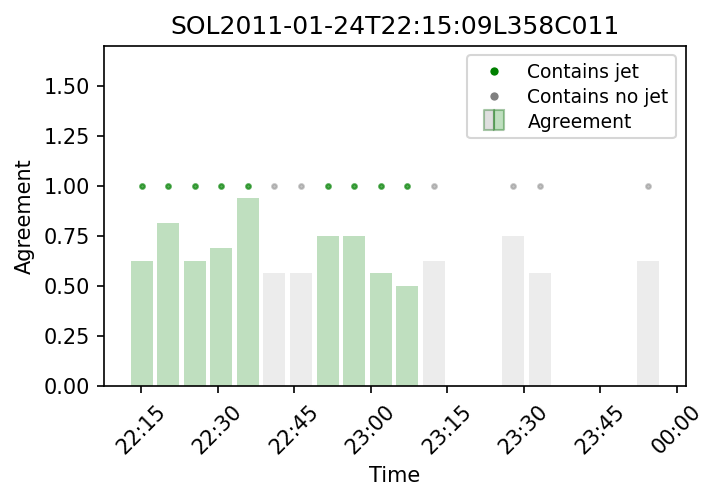

152


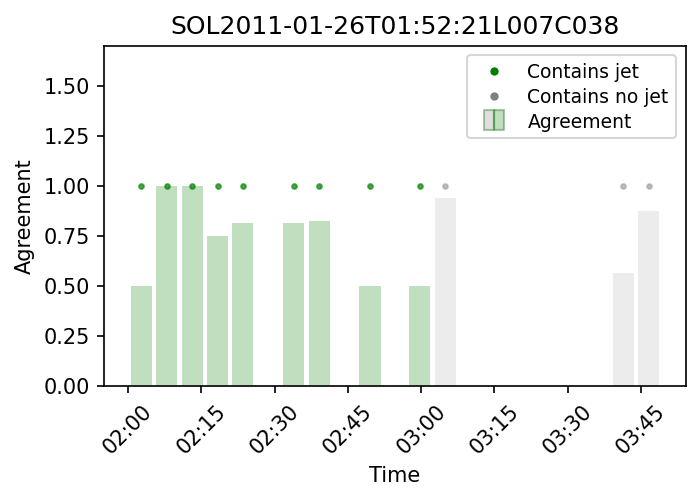

164


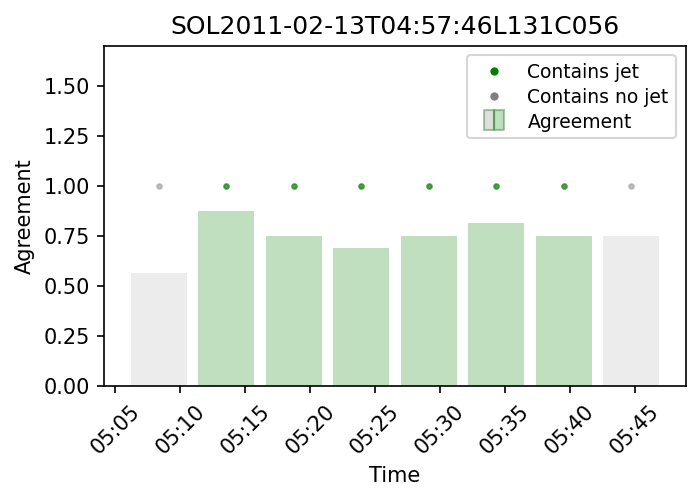

172


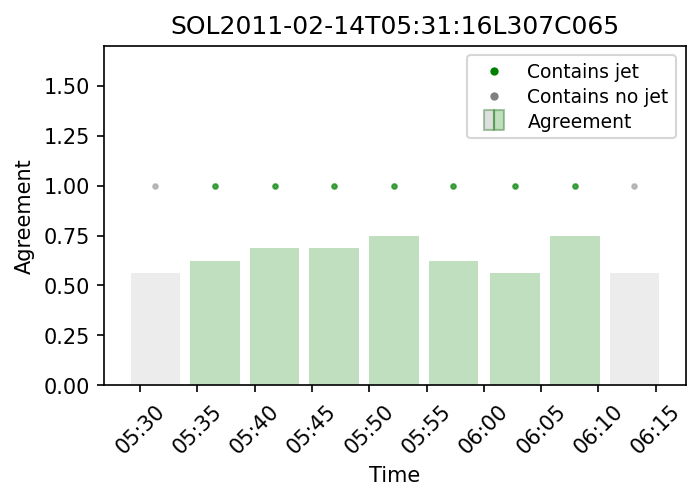

181


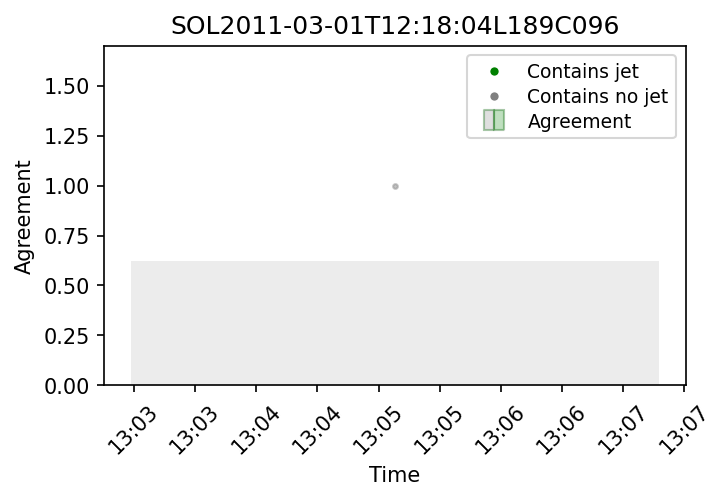

182


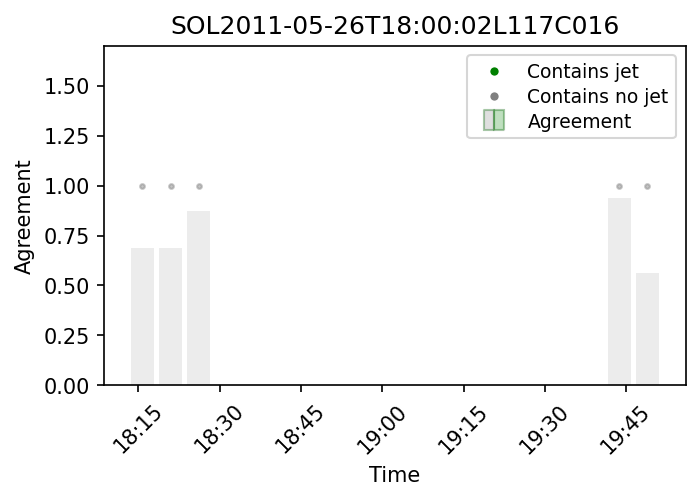

187


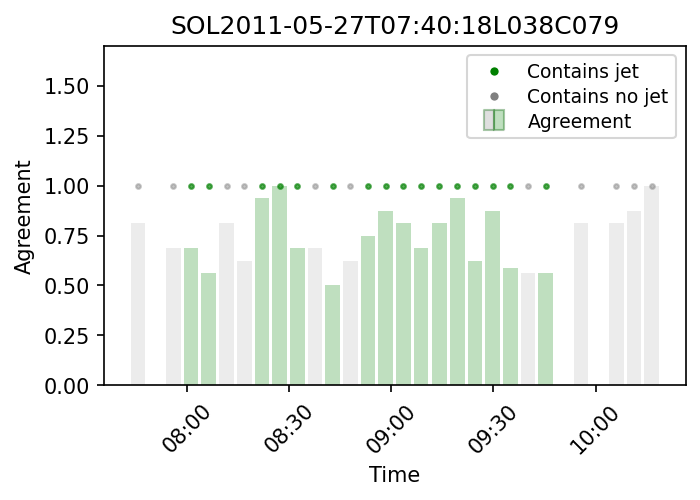

214


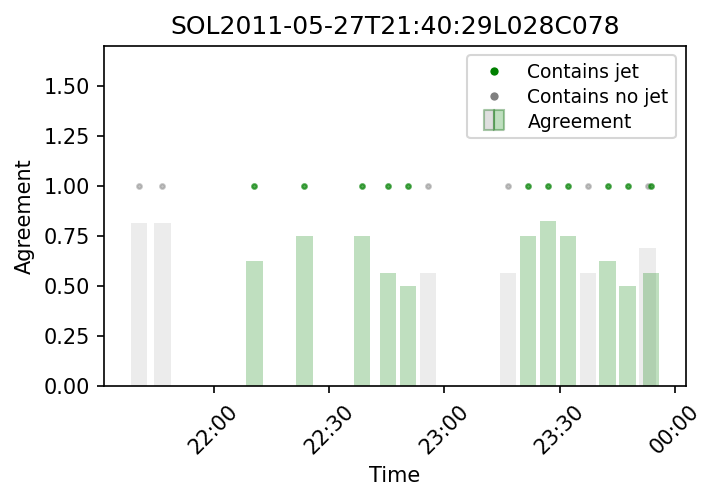

231


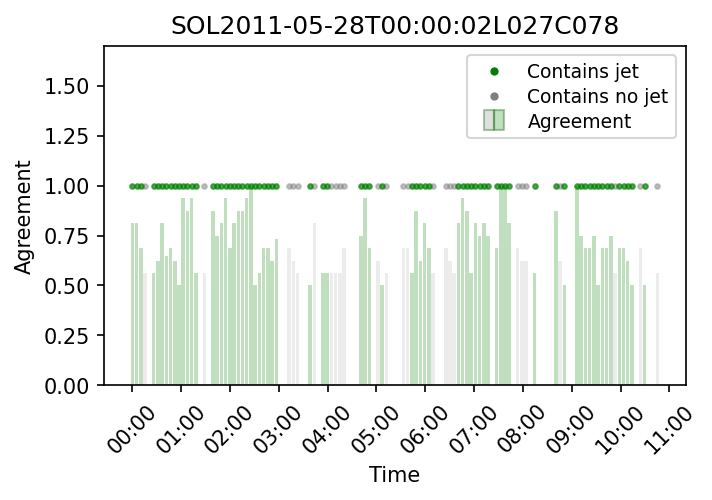

327


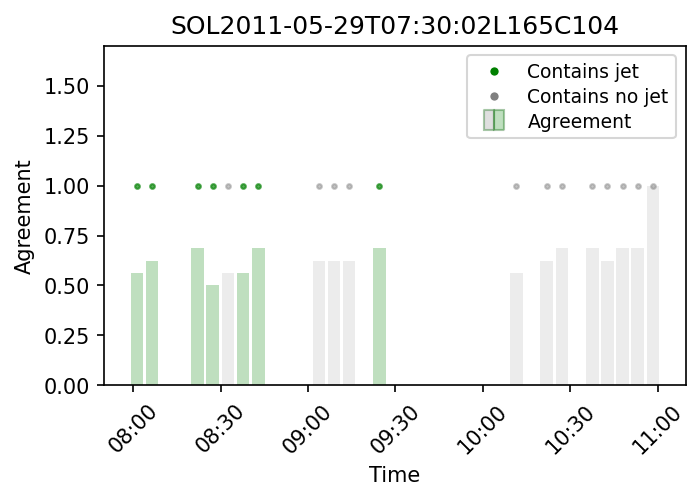

346


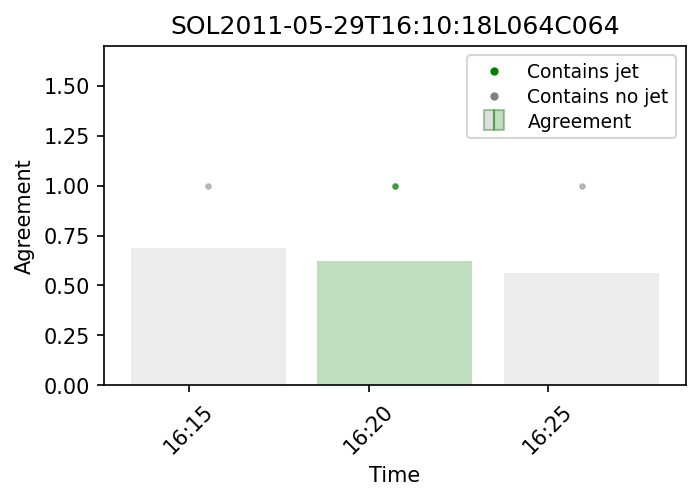

349


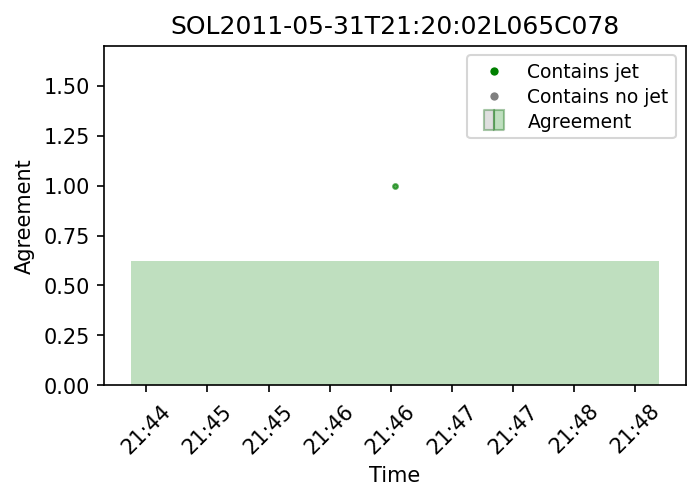

350


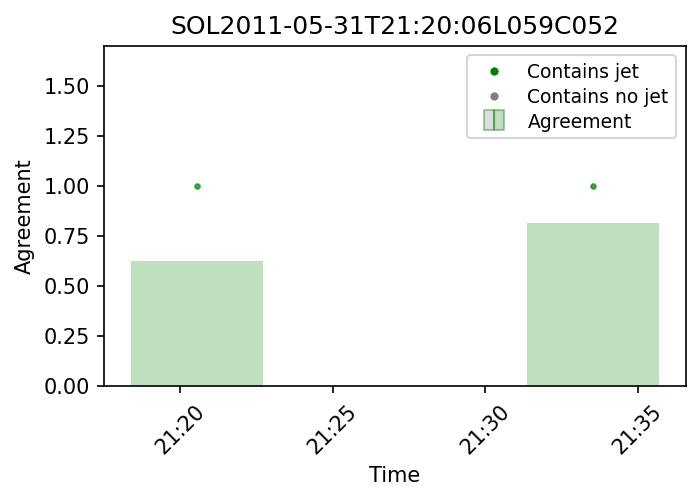

352


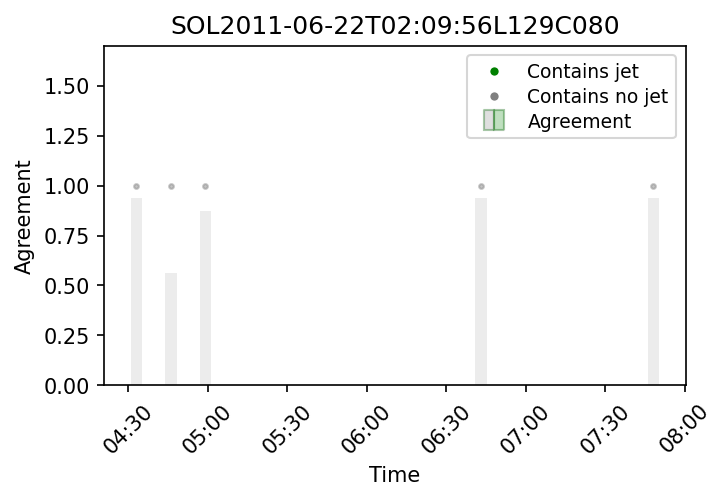

357


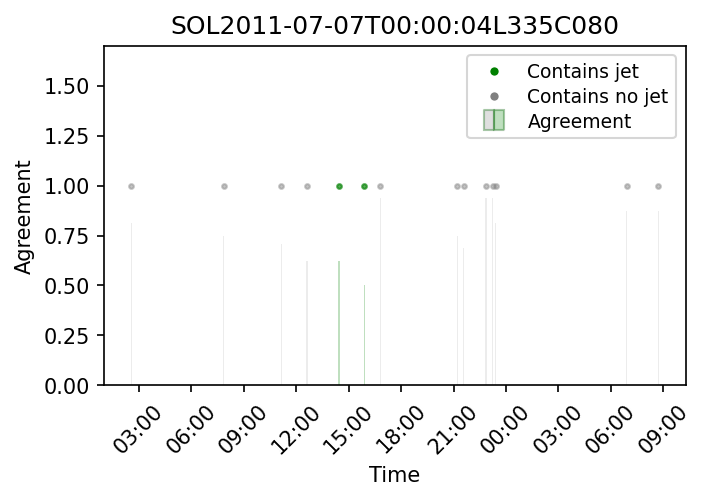

371


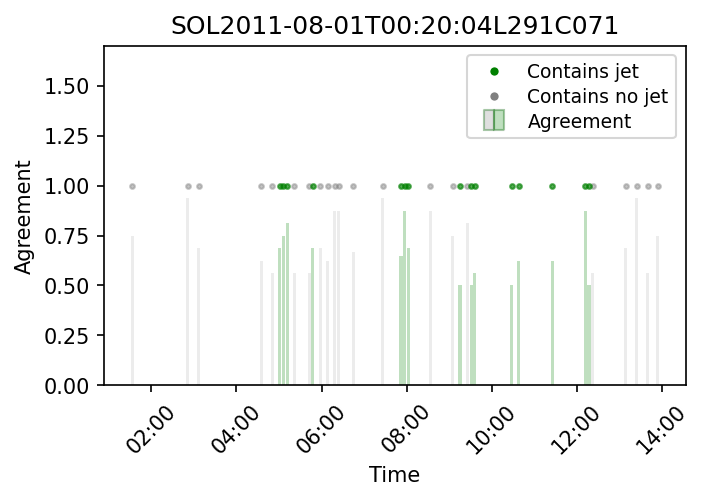

407


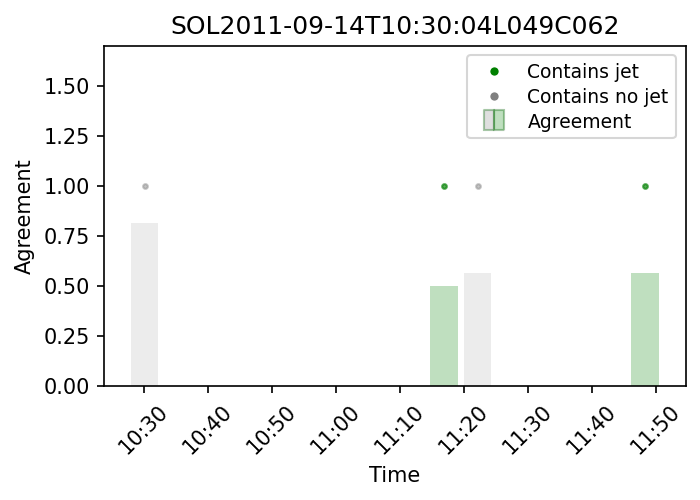

411


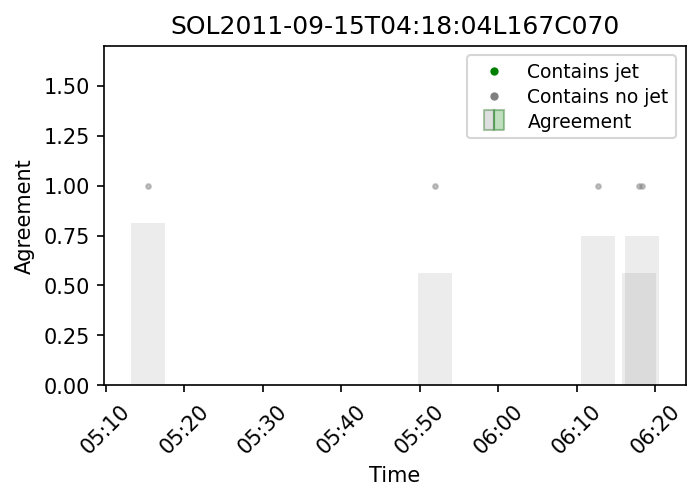

416


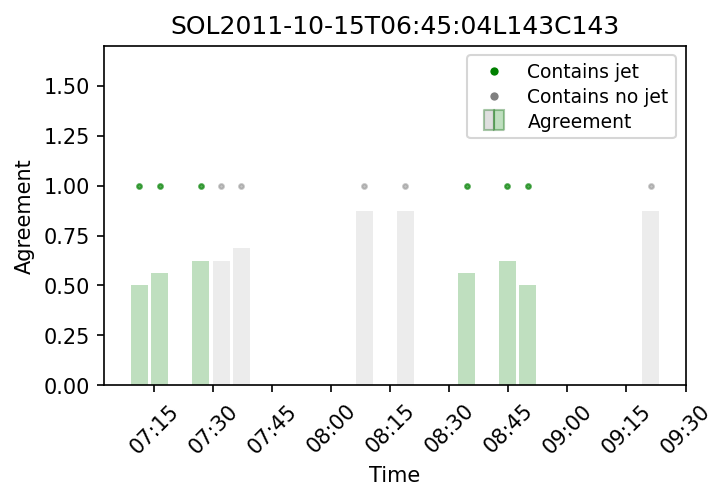

427


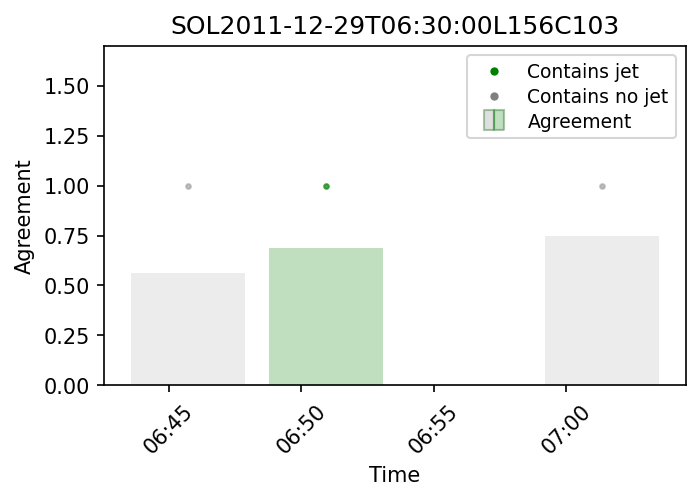

430


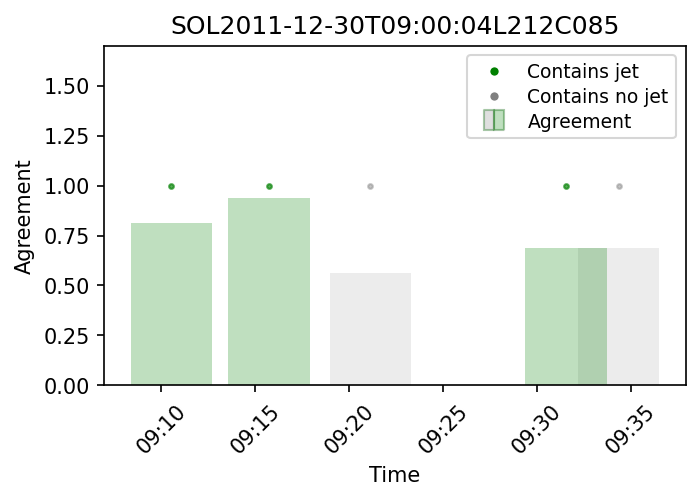

435


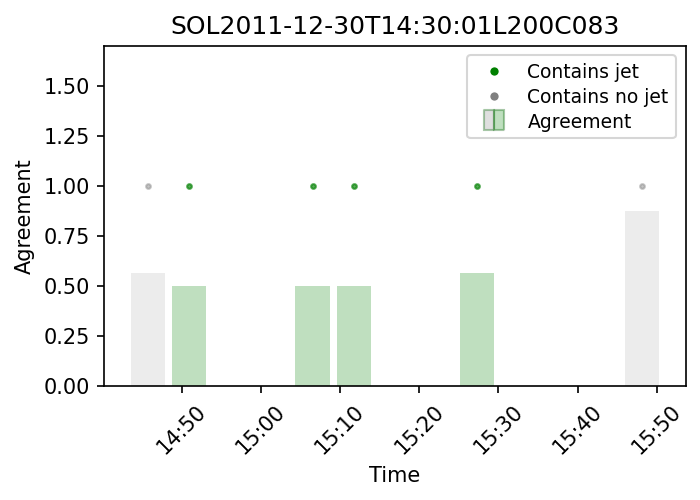

441


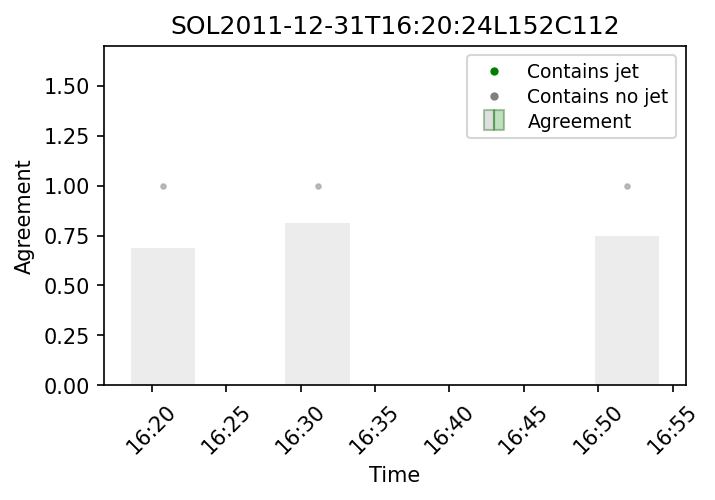

444


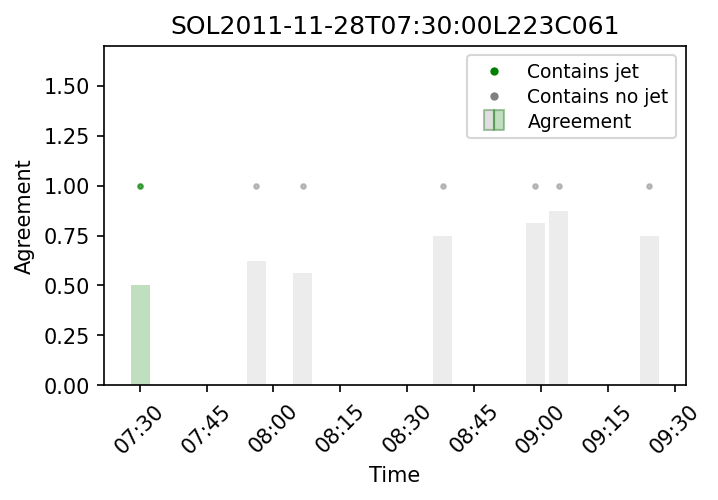

451


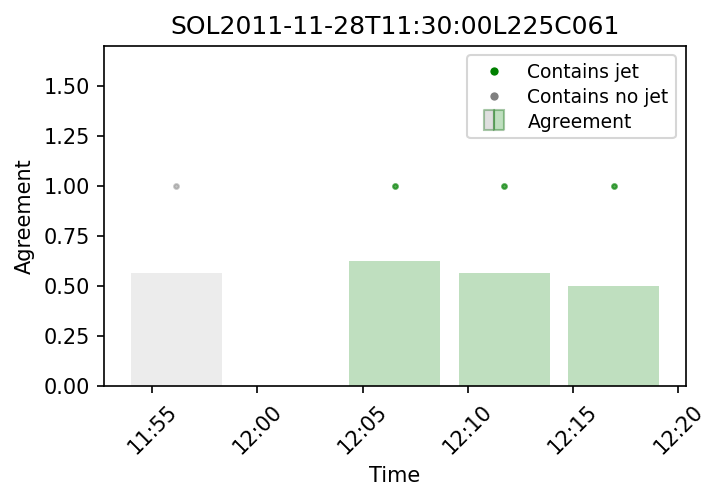

455


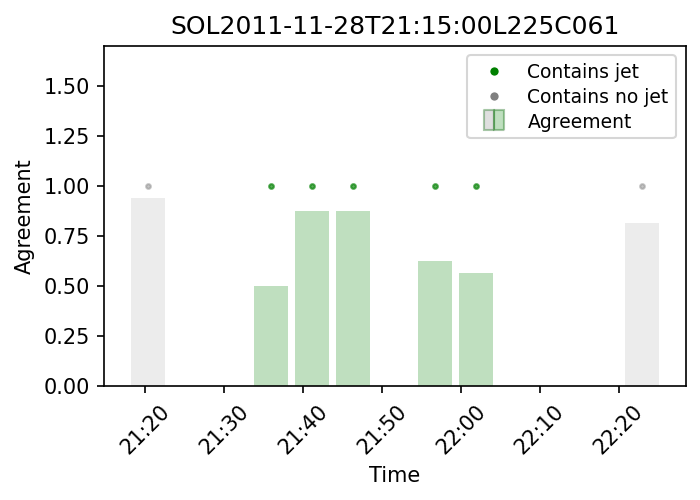

462


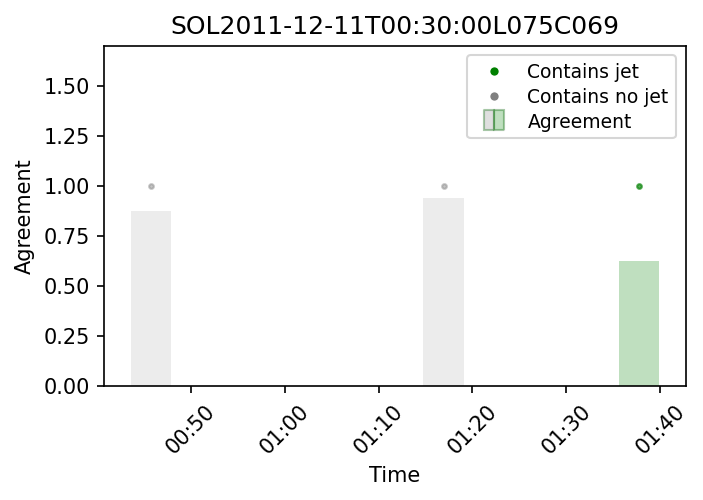

465


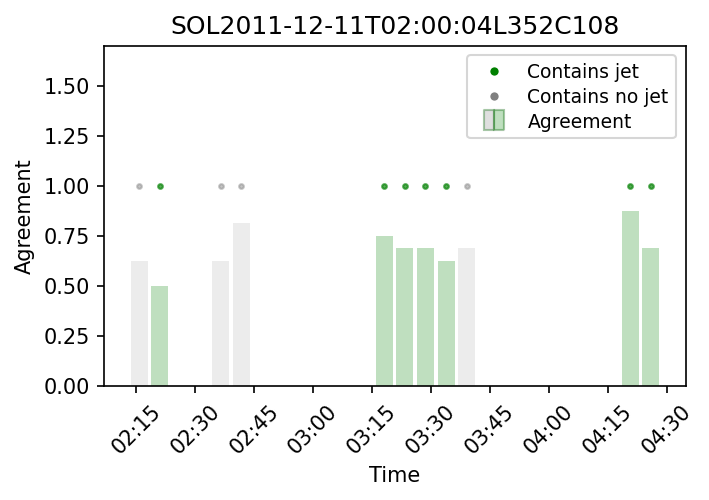

476


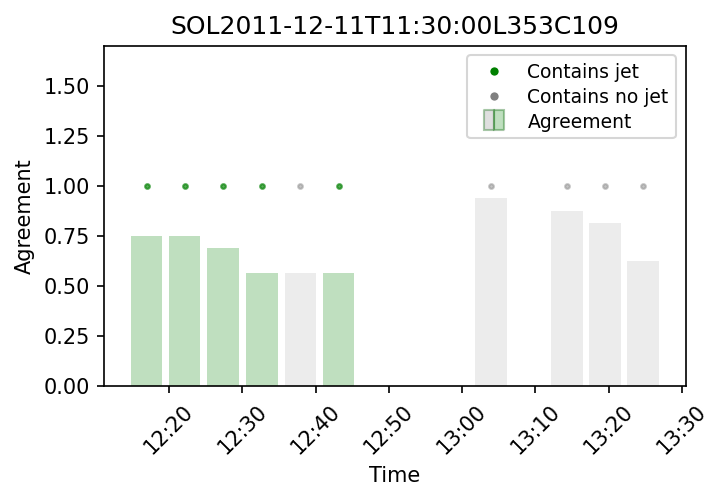

486


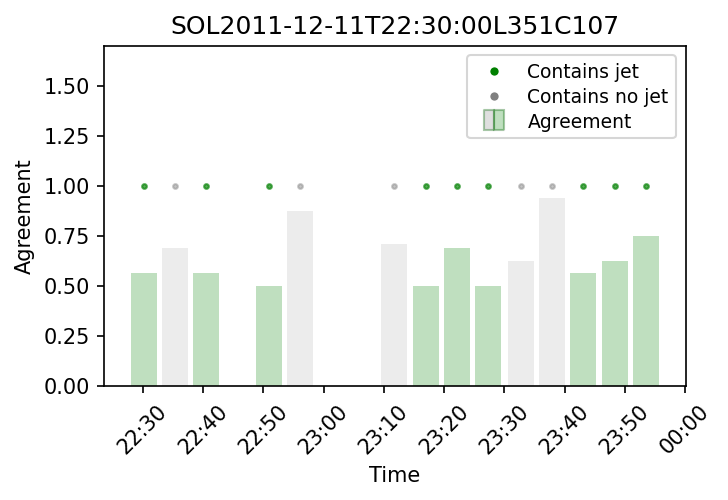

500


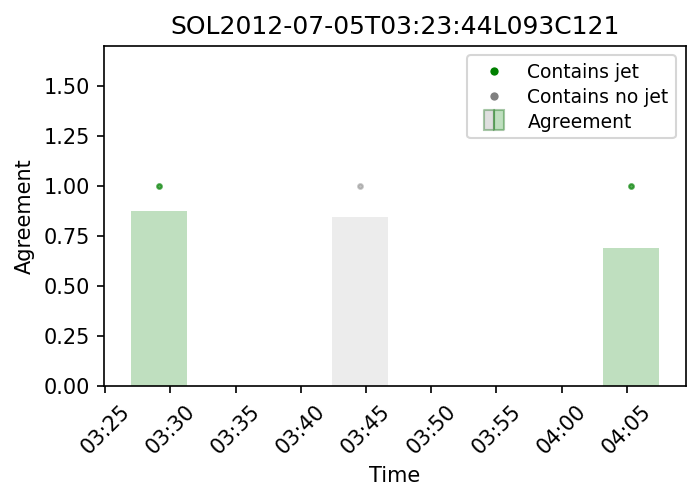

503


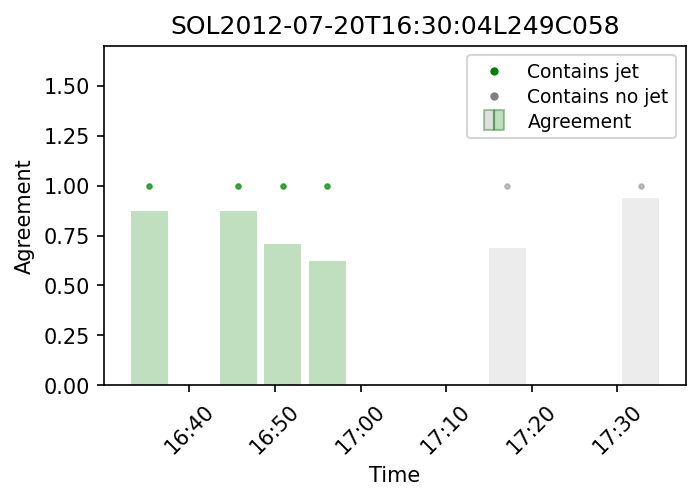

509


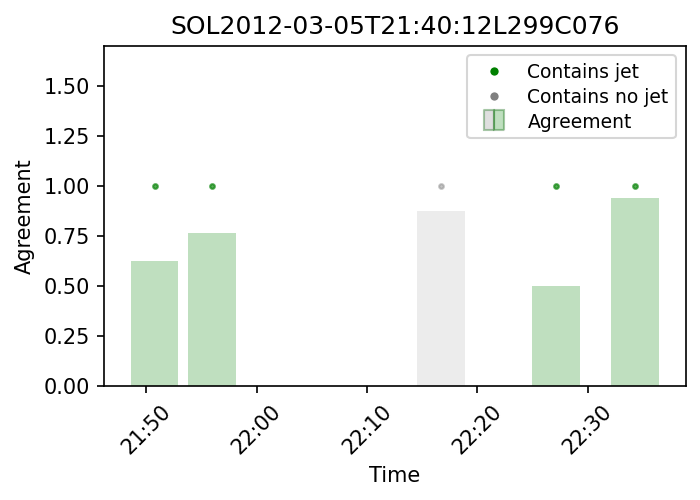

514


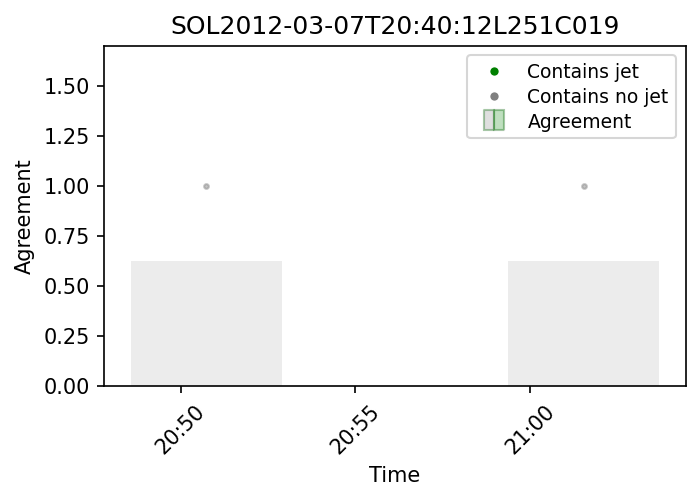

516


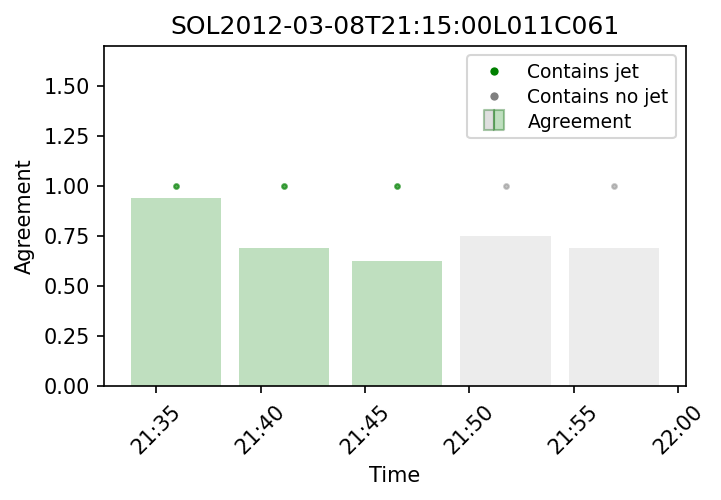

521


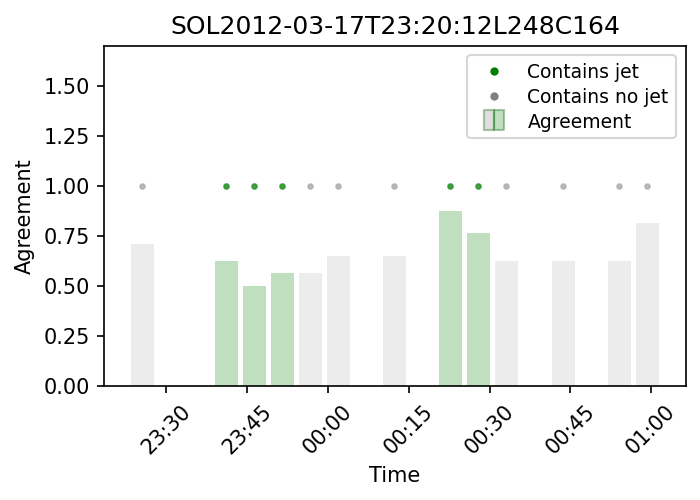

534


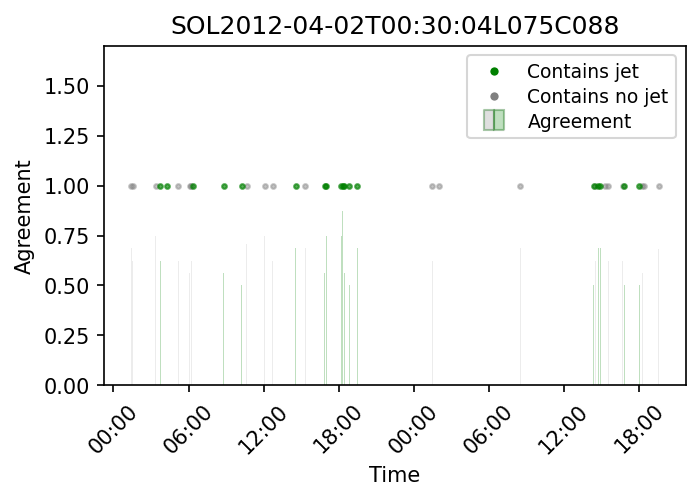

572


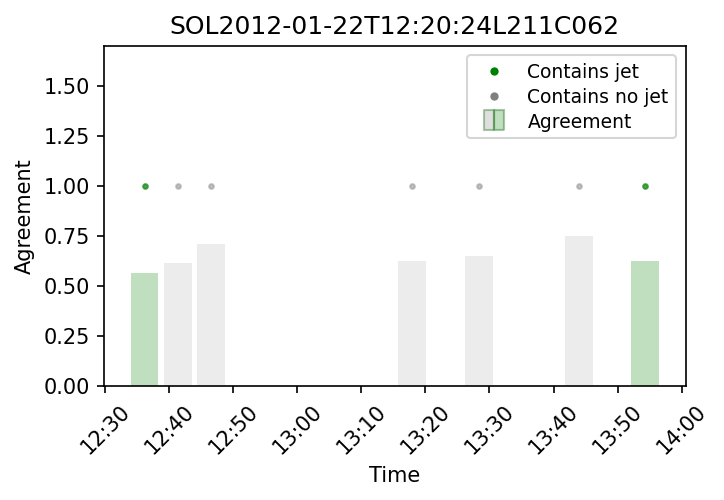

579


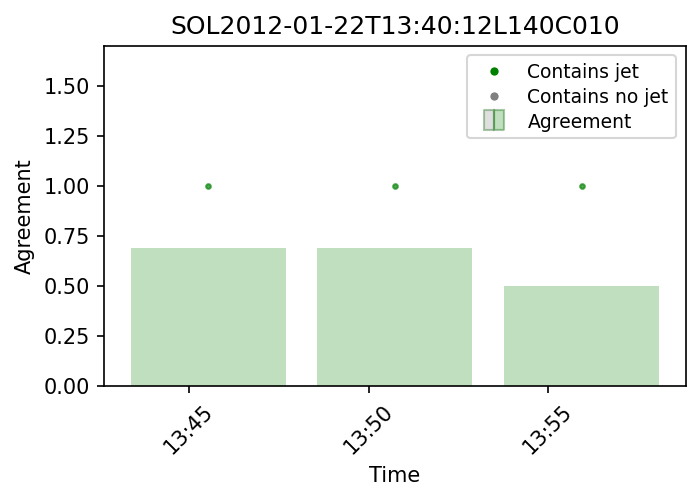

582


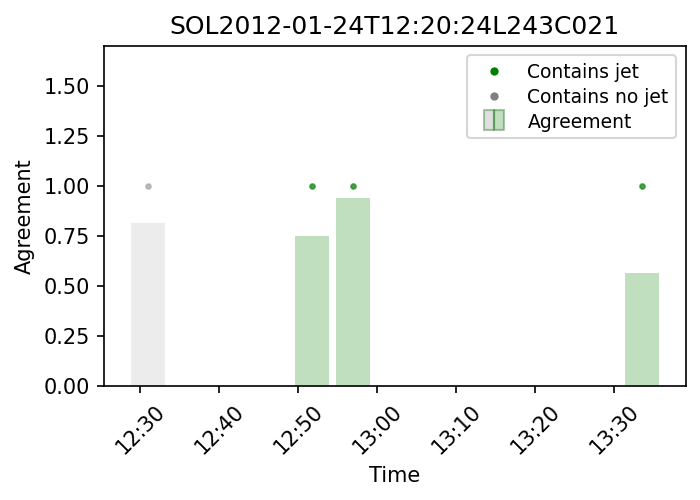

586


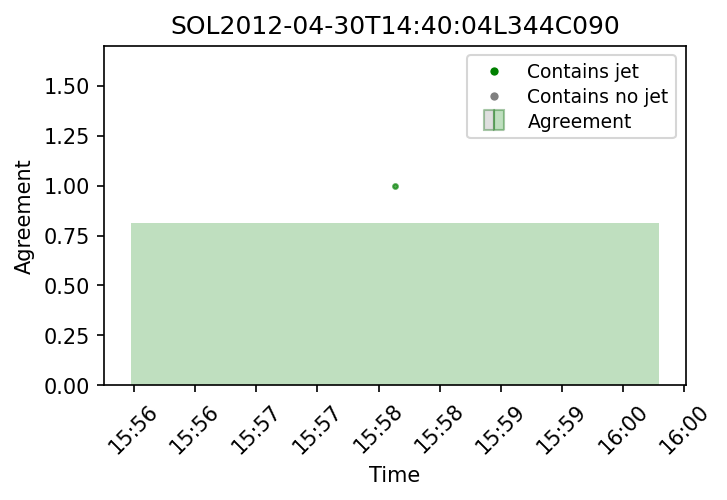

587


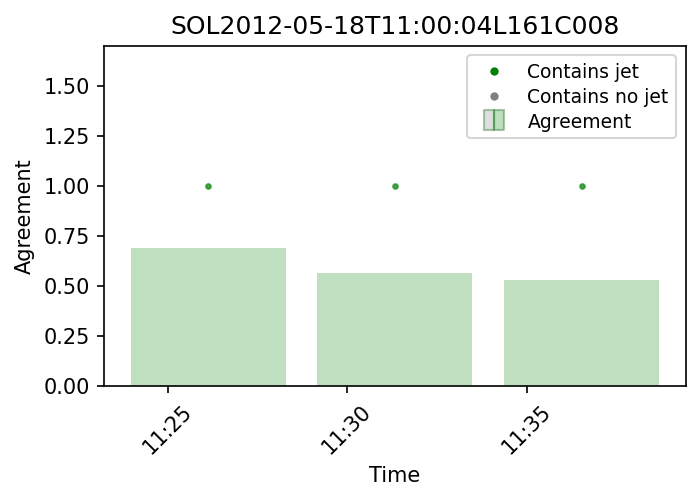

590


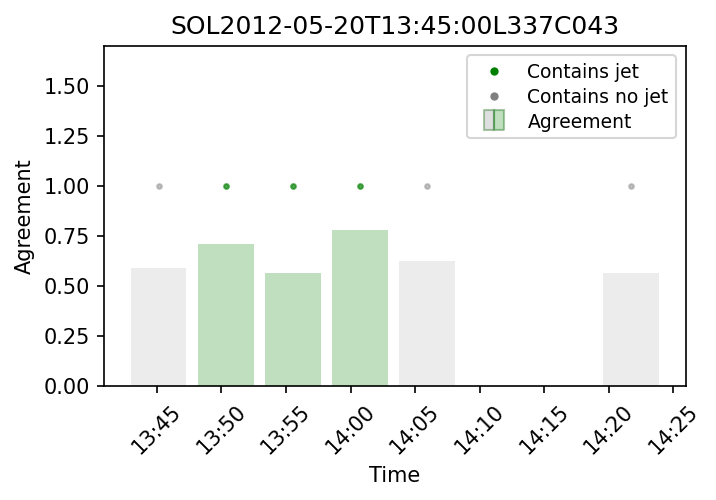

596


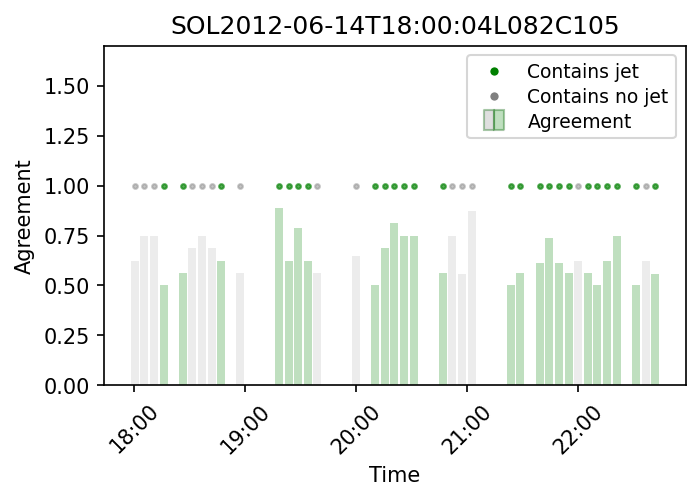

635


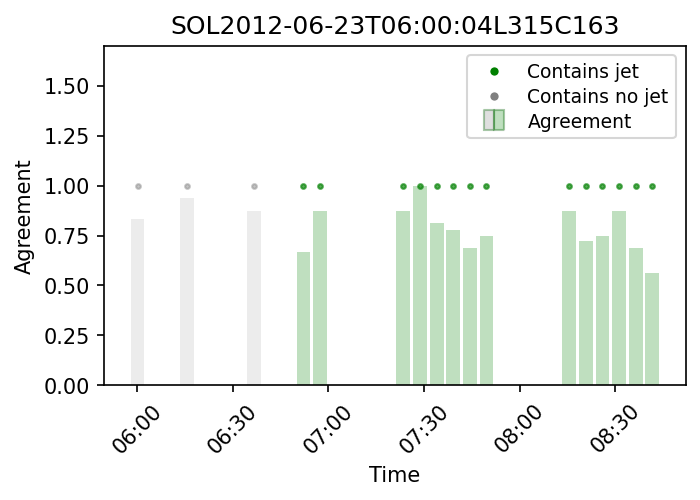

652


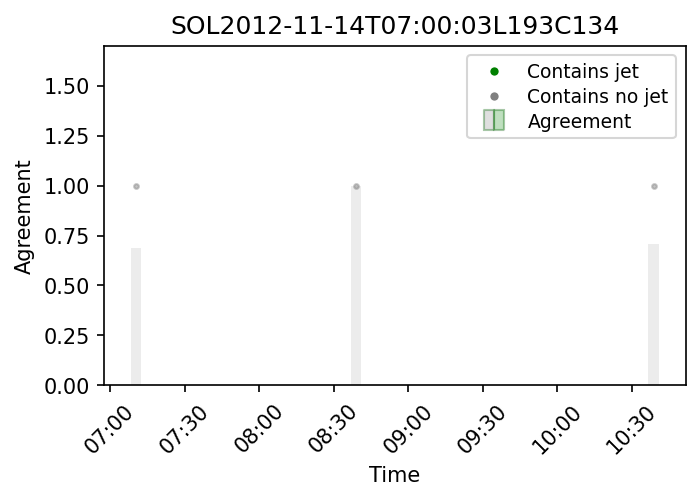

655


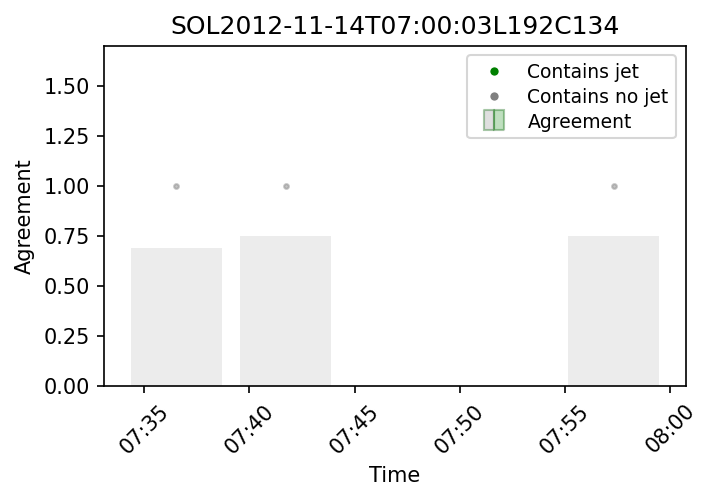

658


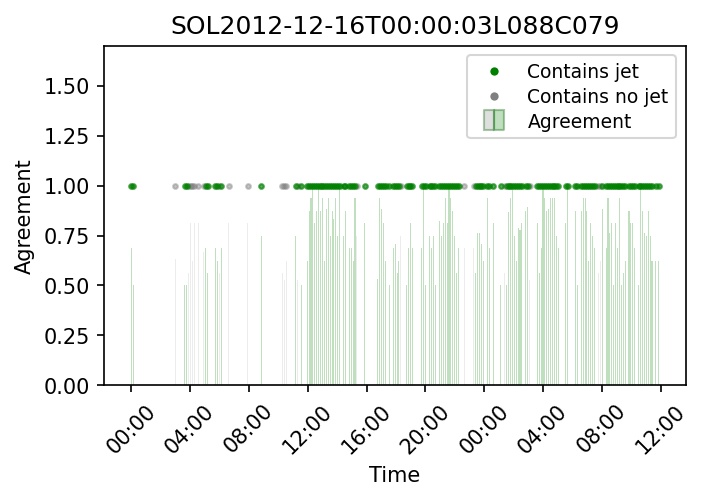

819


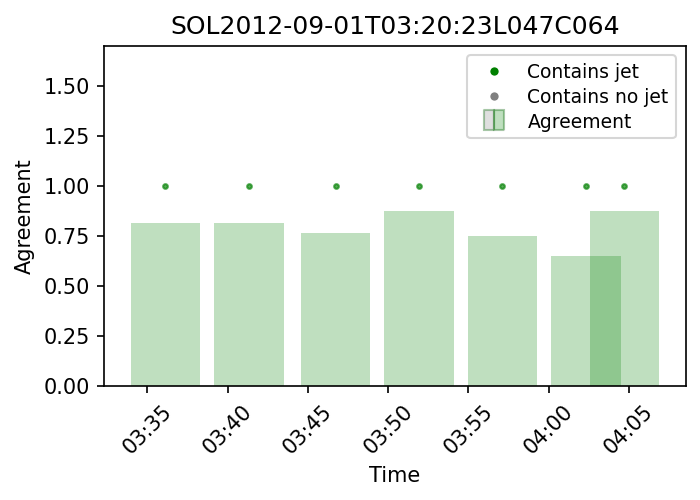

826


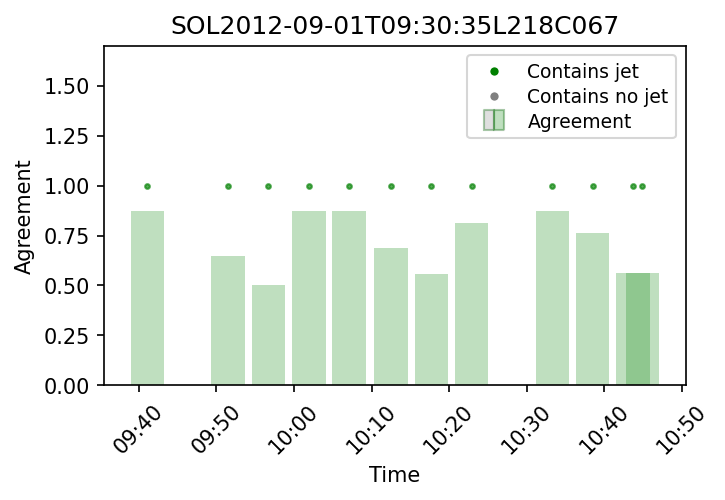

838


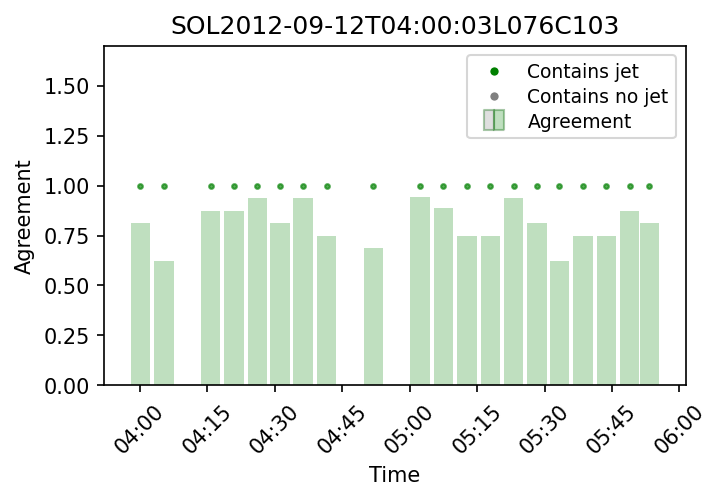

858


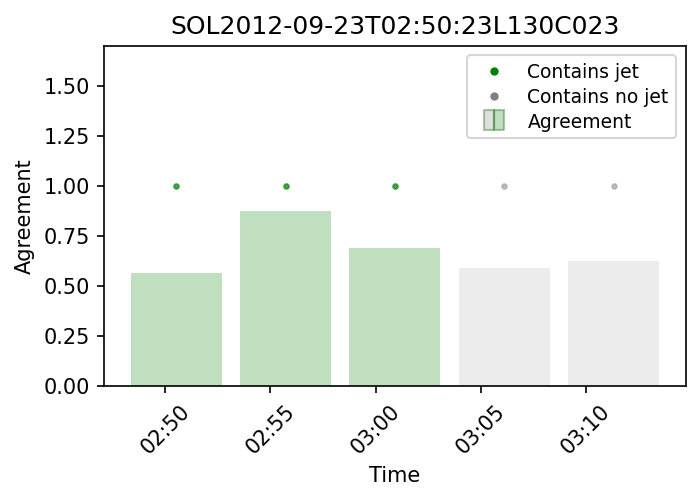

863


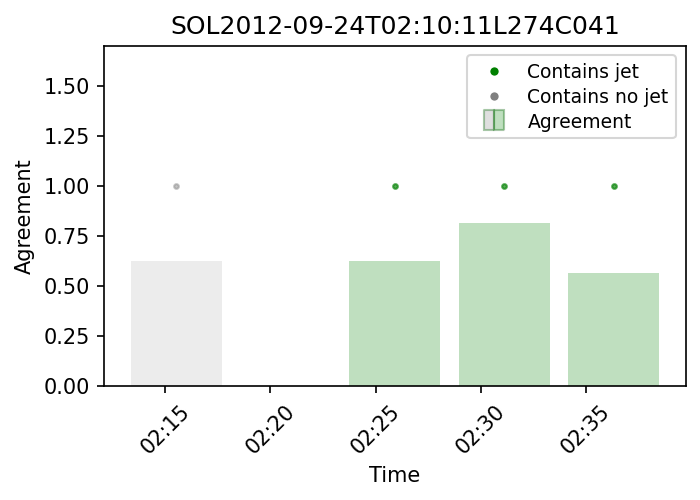

867


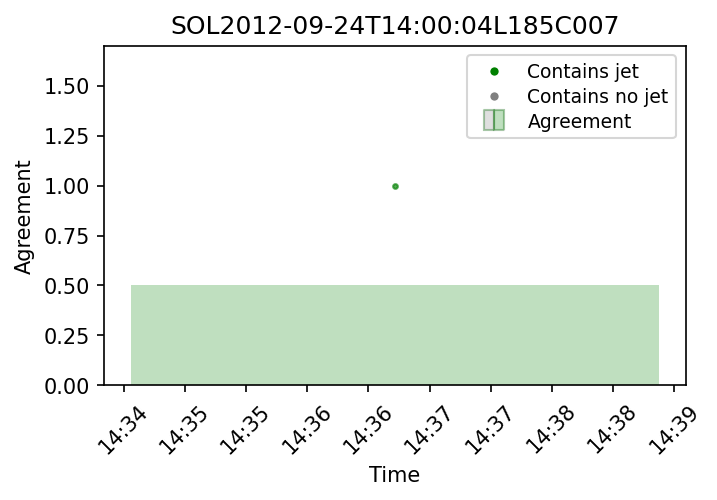

868


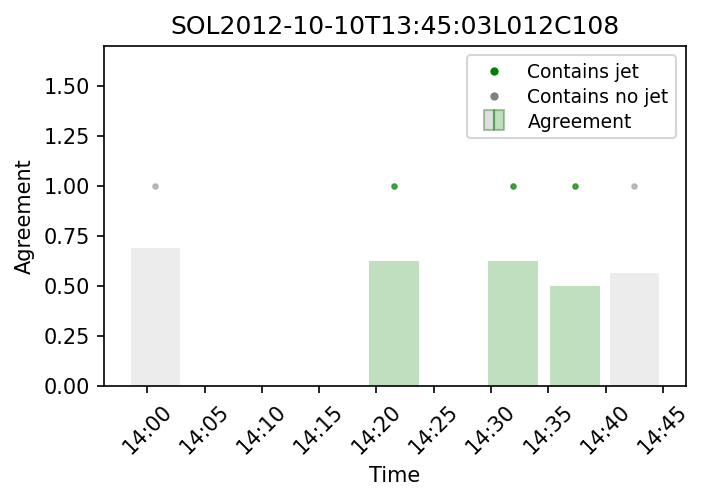

873


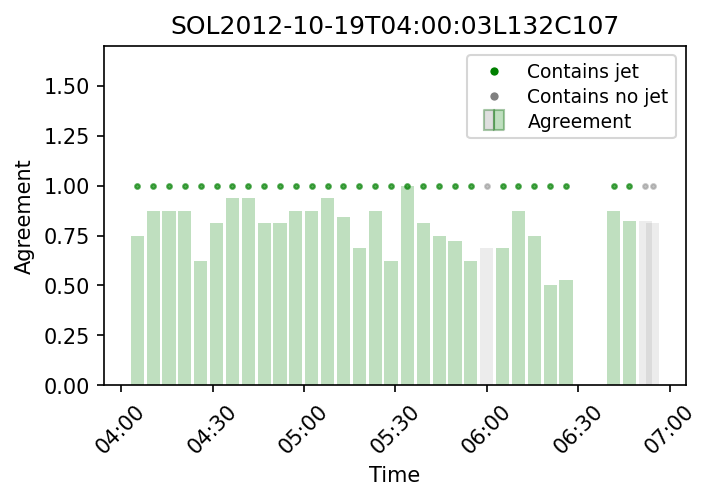

905


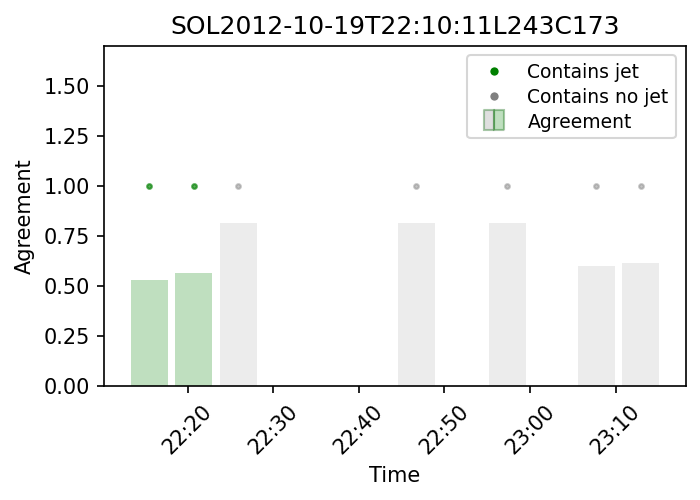

912


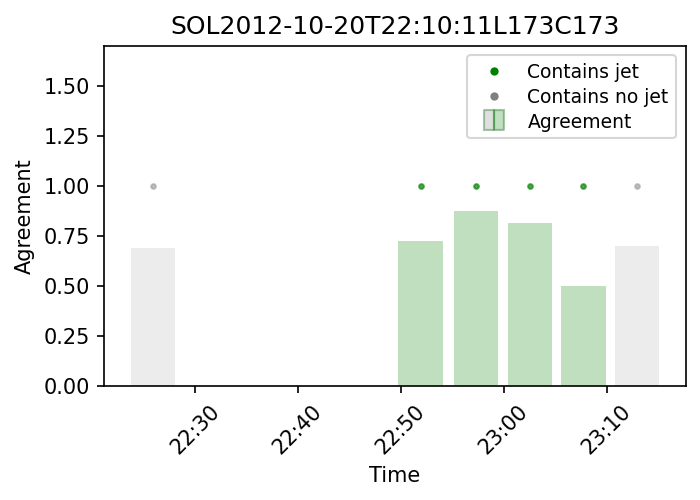

918


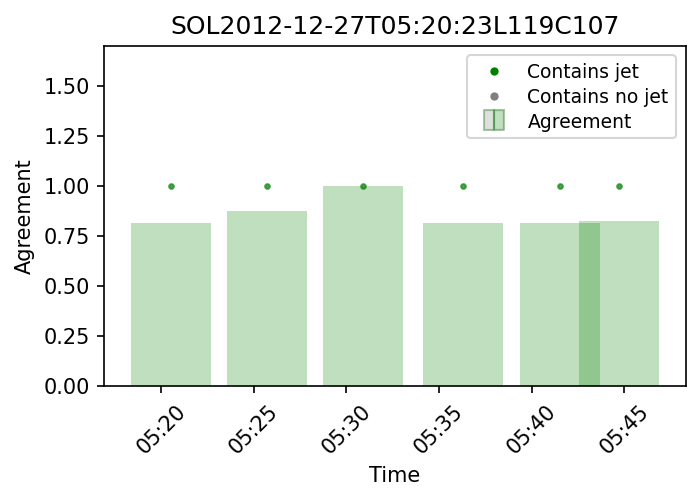

924


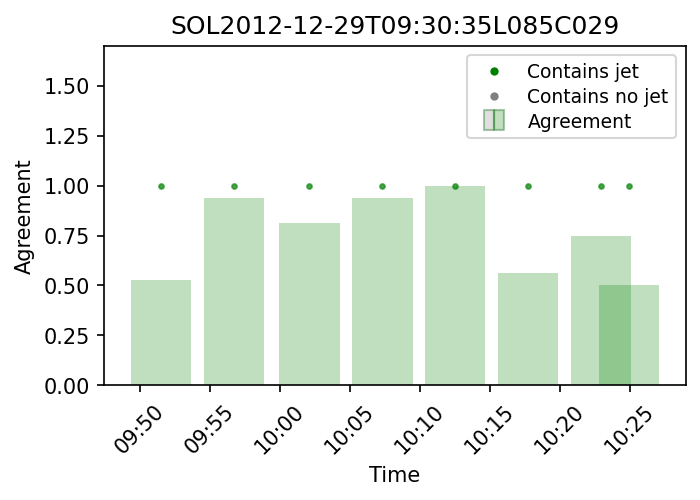

932


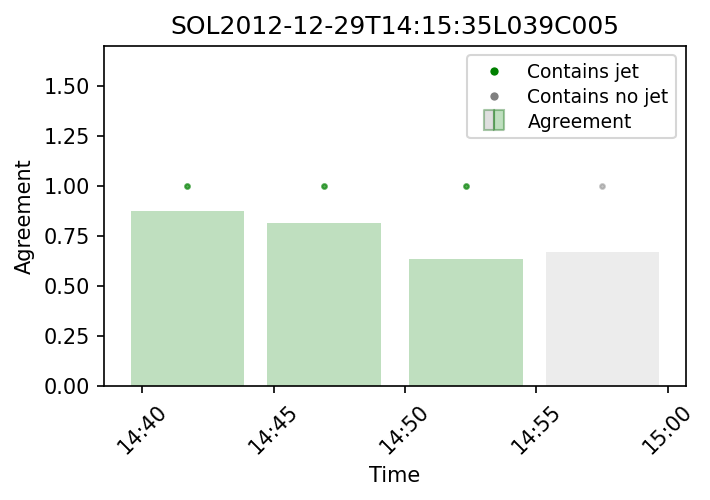

936


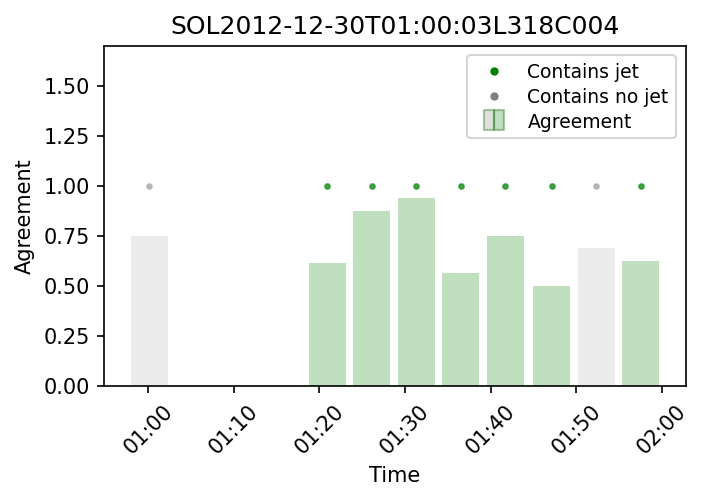

945


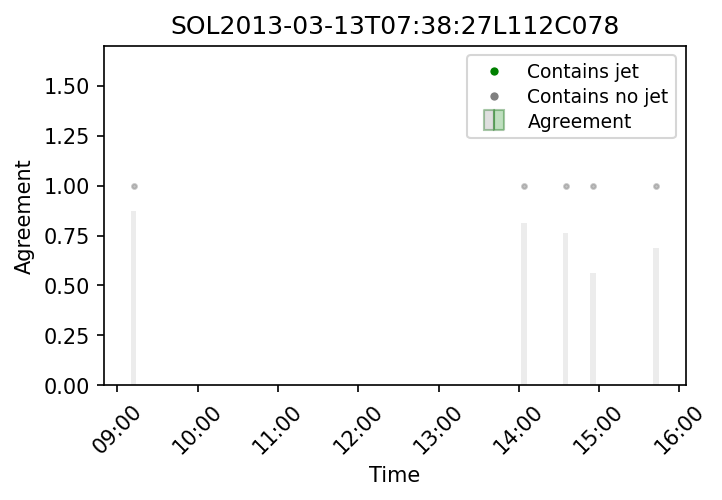

950


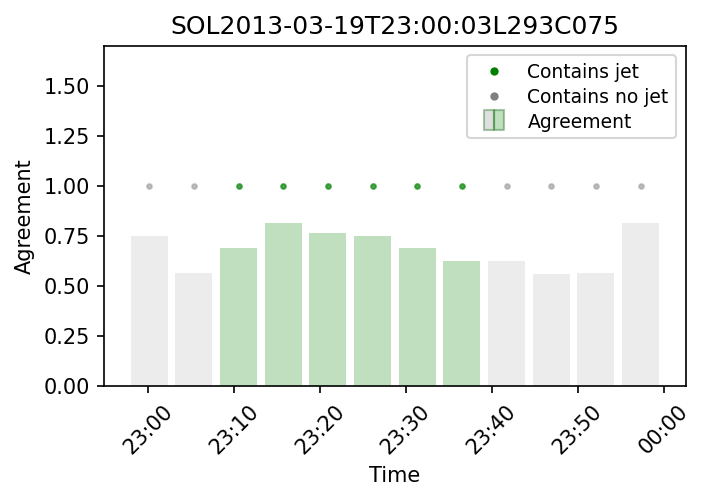

962


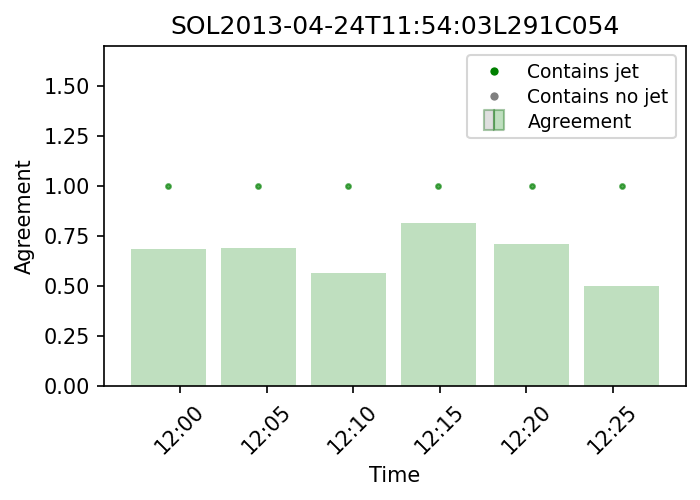

968


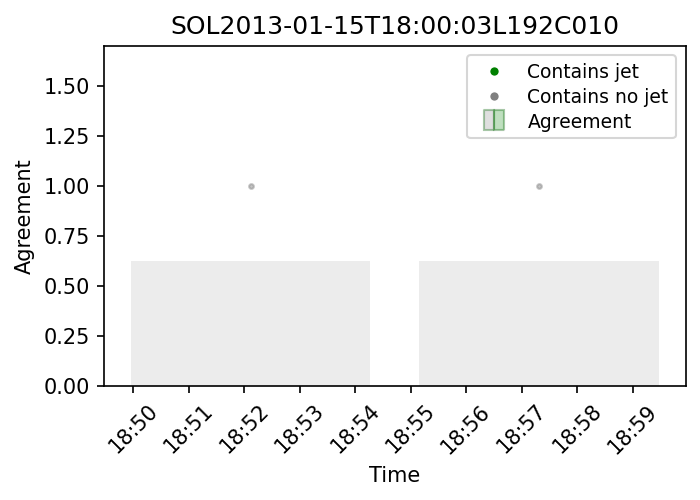

970


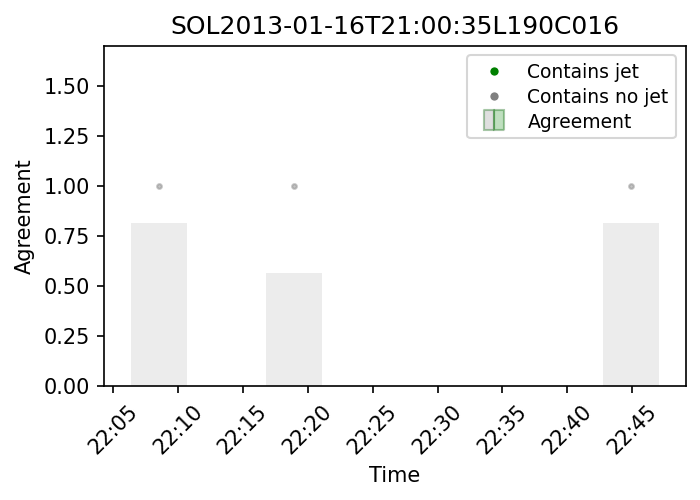

973


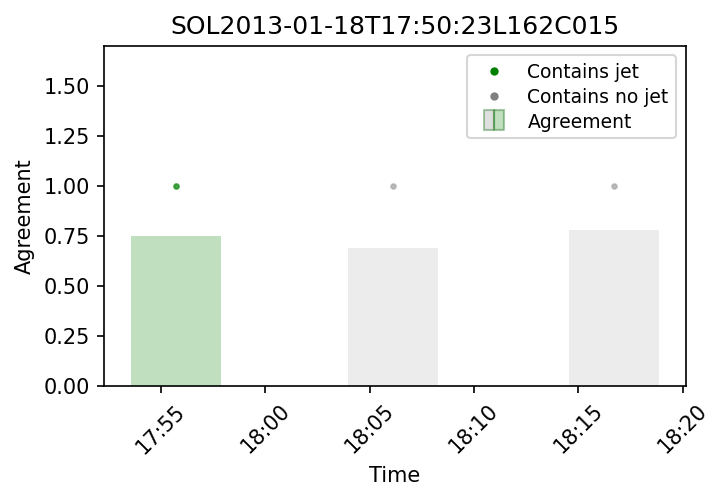

976


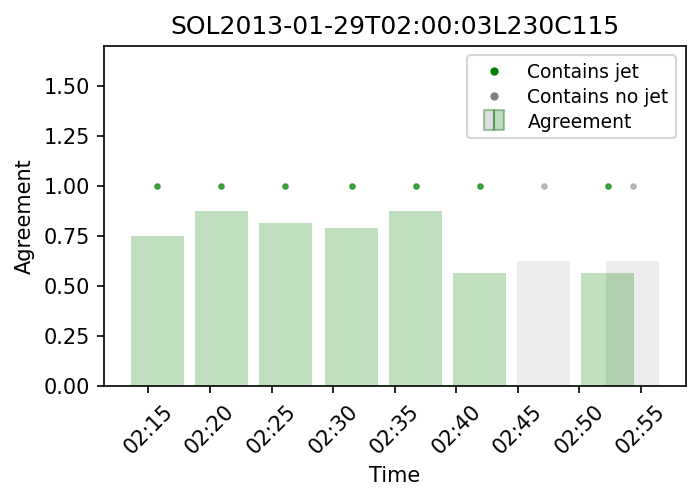

985


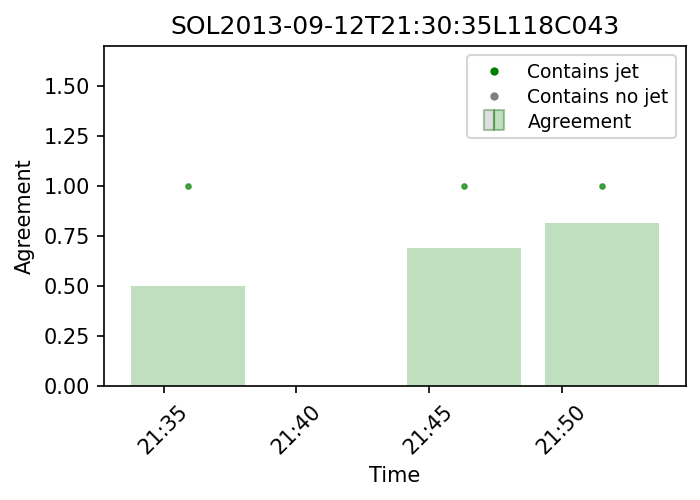

988


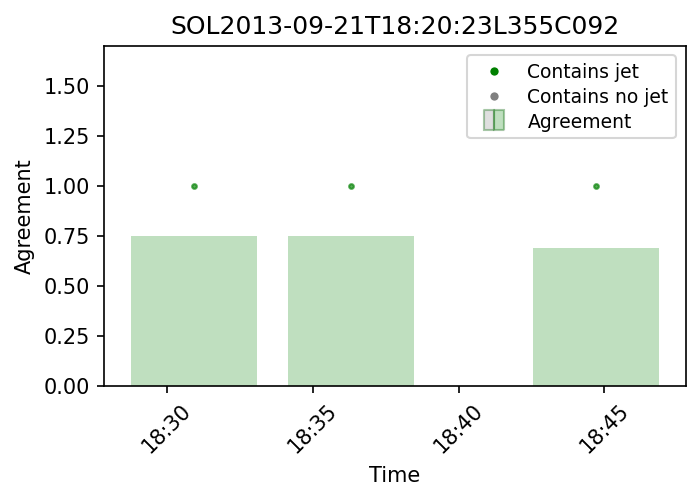

991


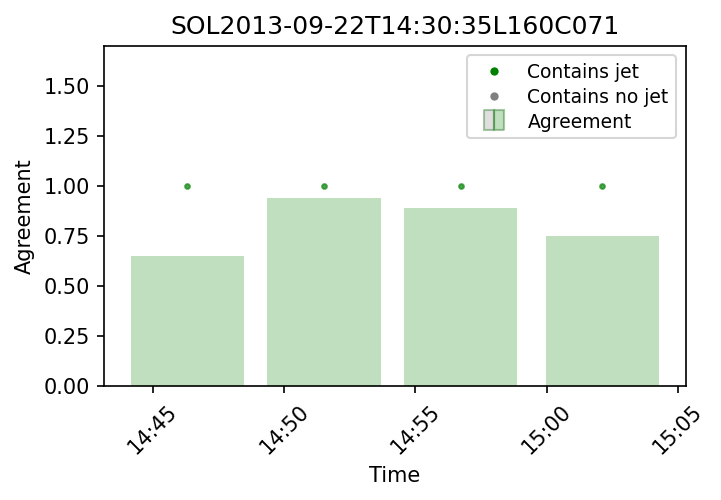

995


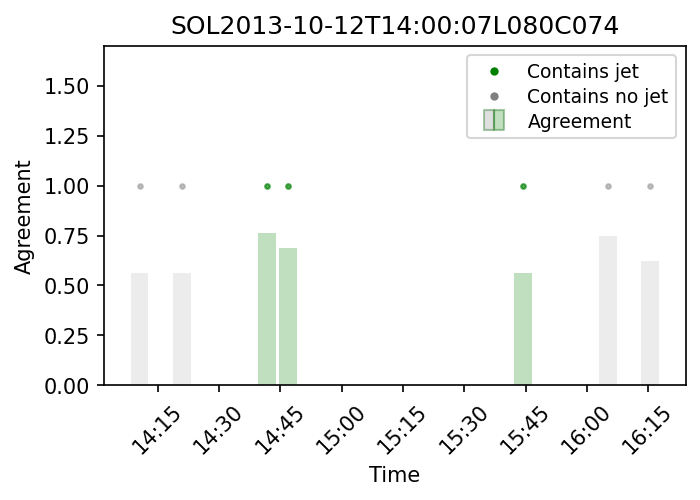

1002


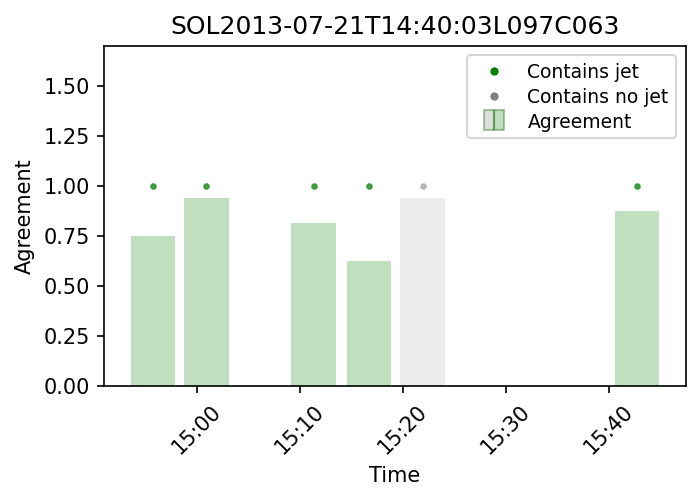

1008


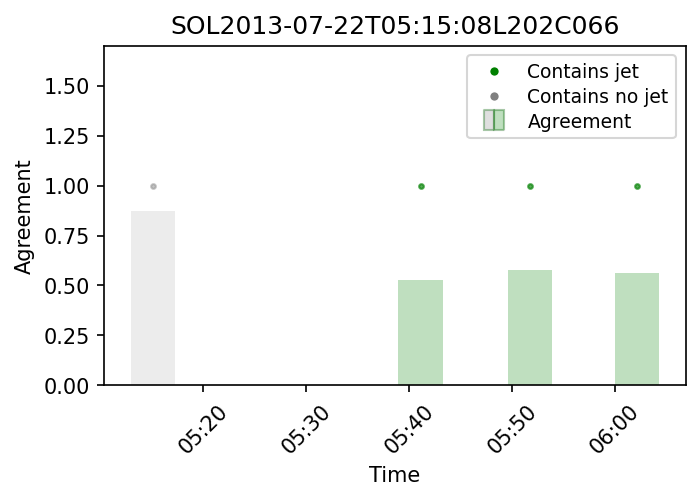

1012


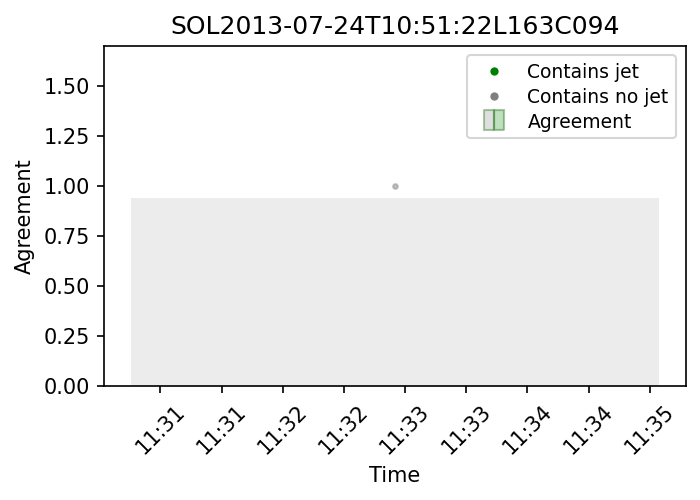

1013


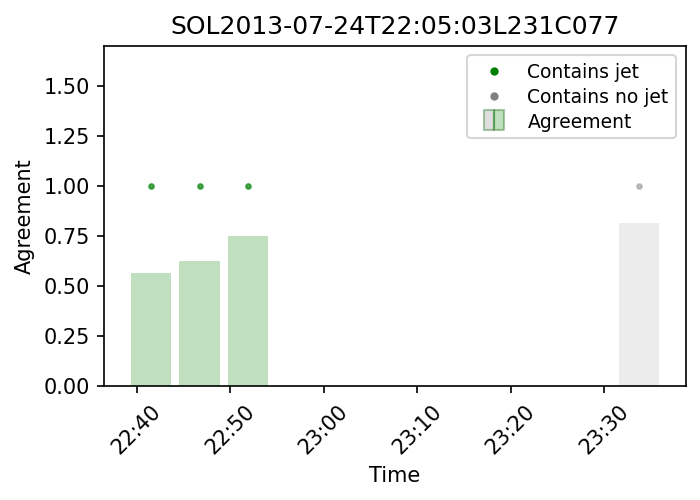

1017


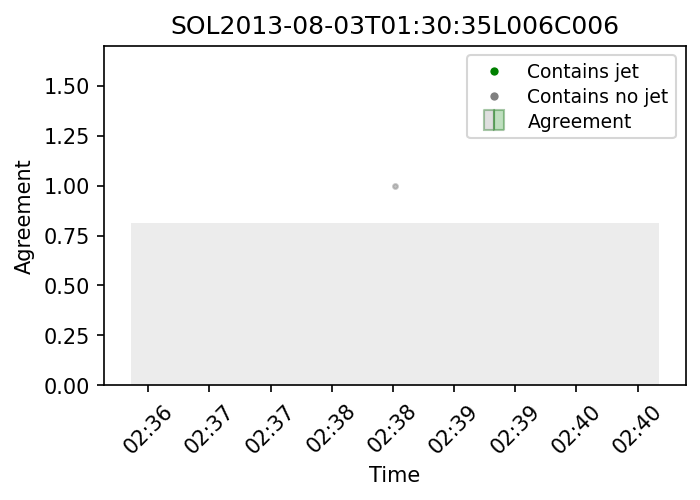

1018


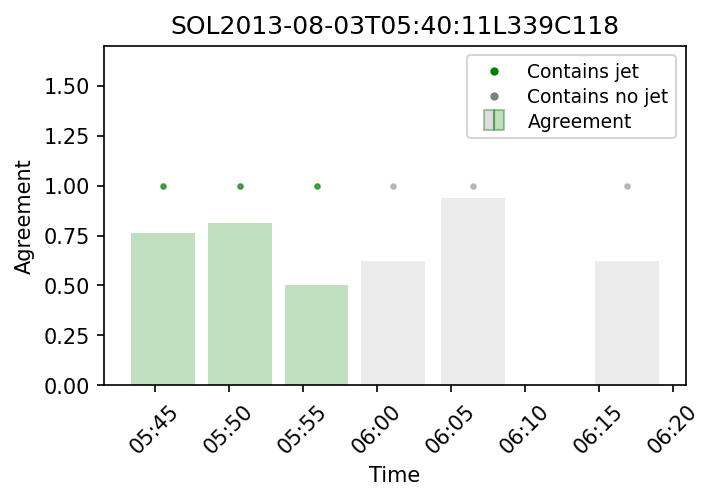

1024


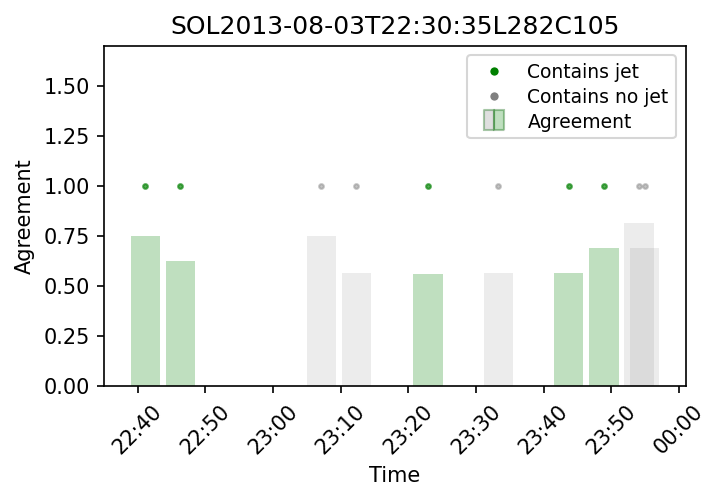

1034


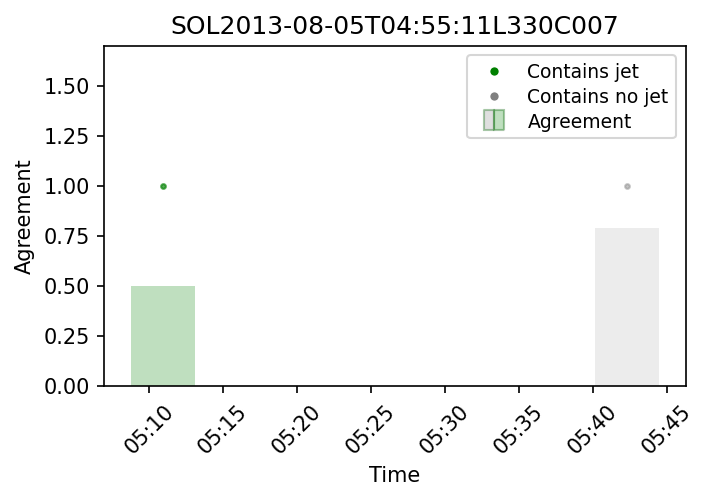

1036


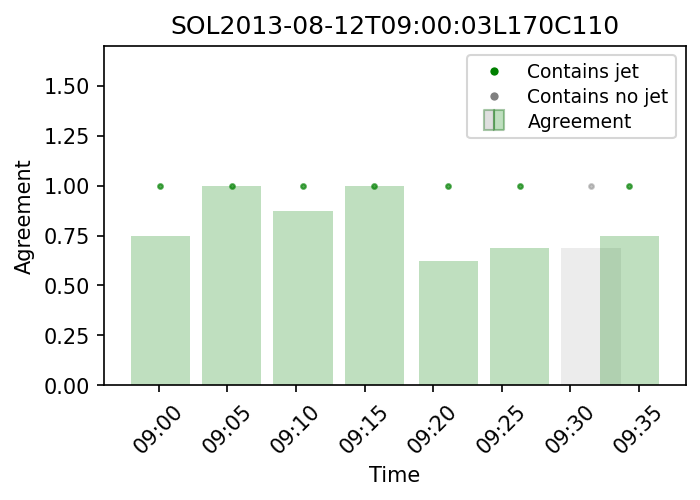

1044


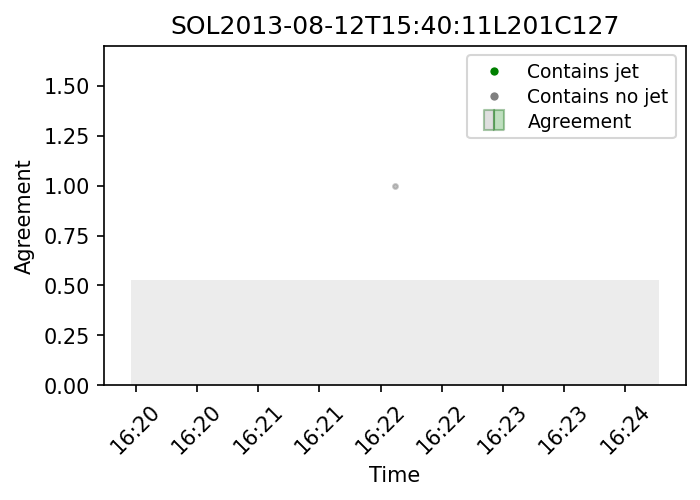

1045


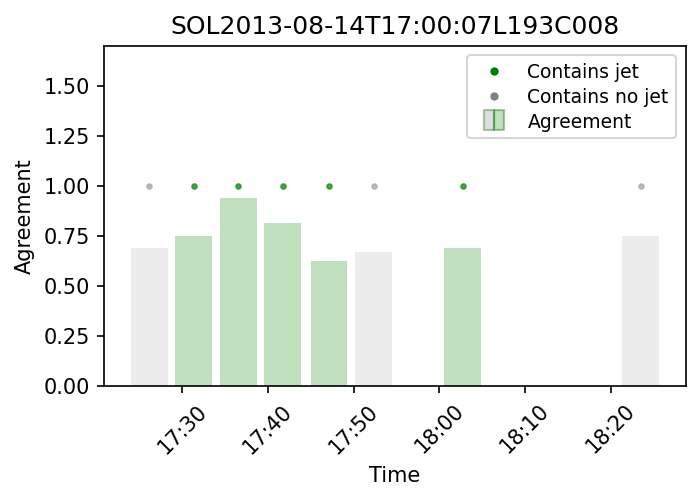

1053


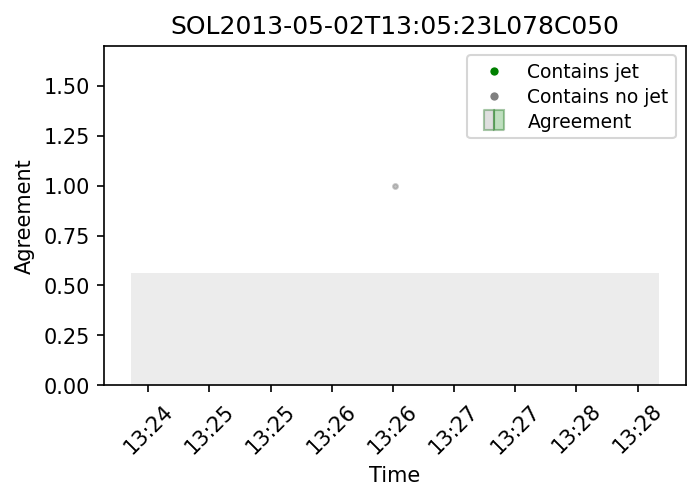

1054


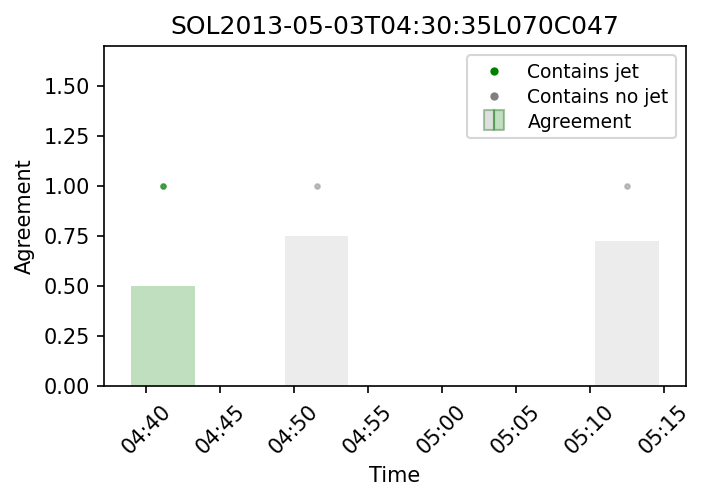

1057


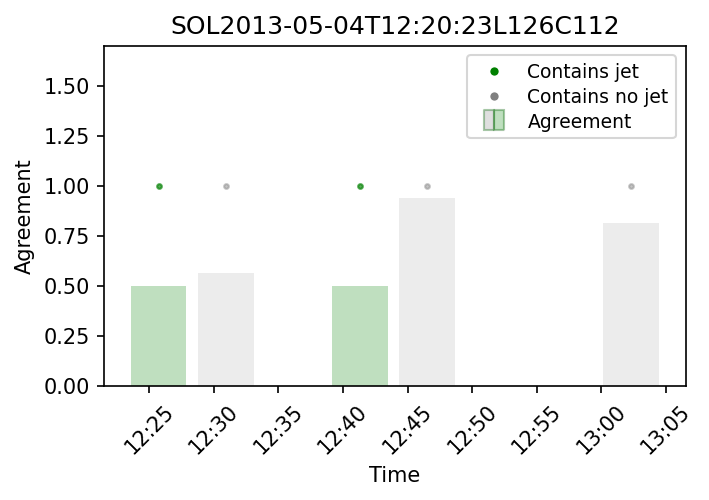

1062


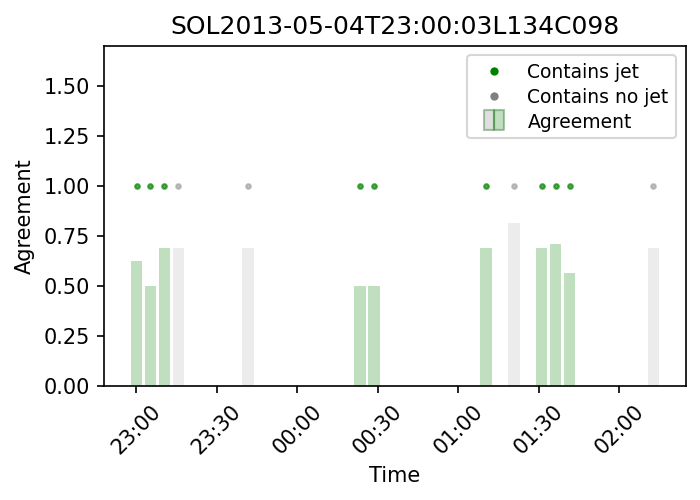

1075


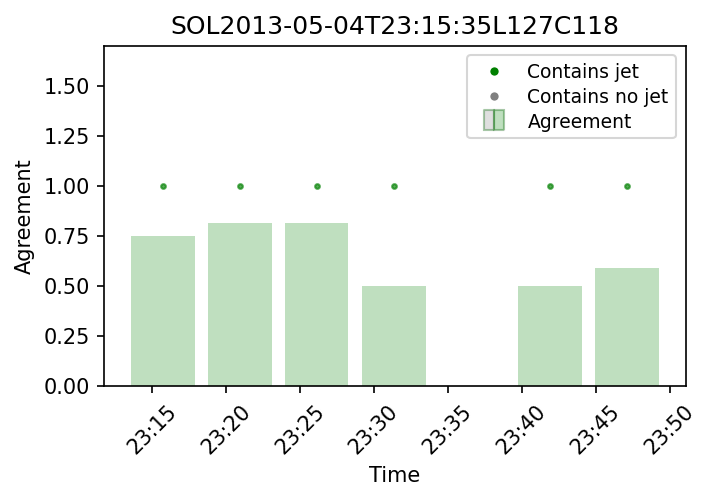

1081


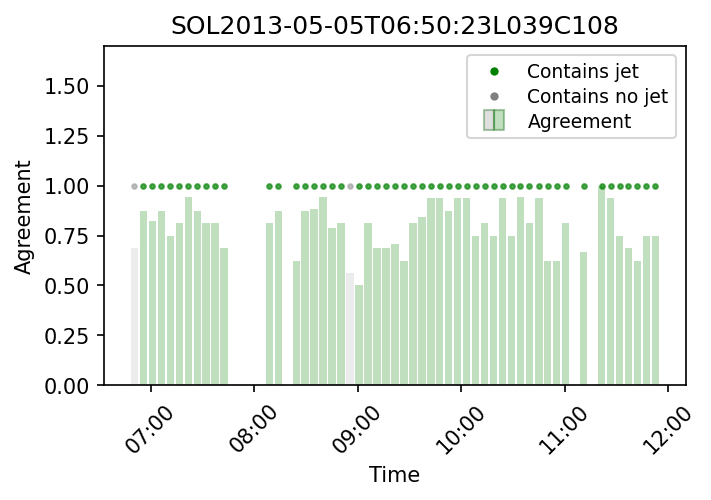

1133


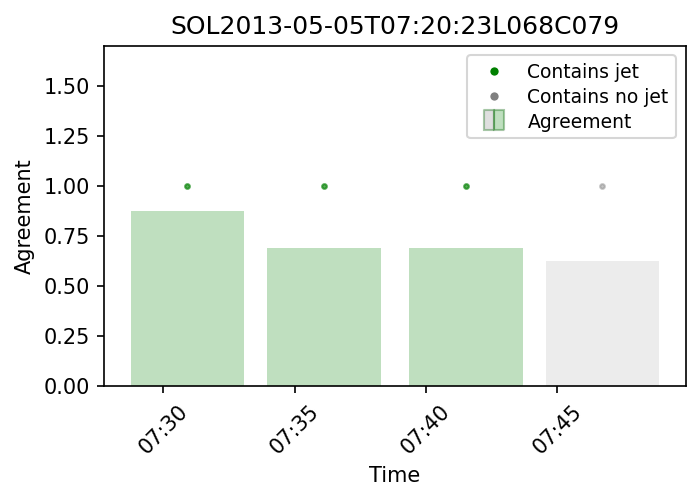

1137


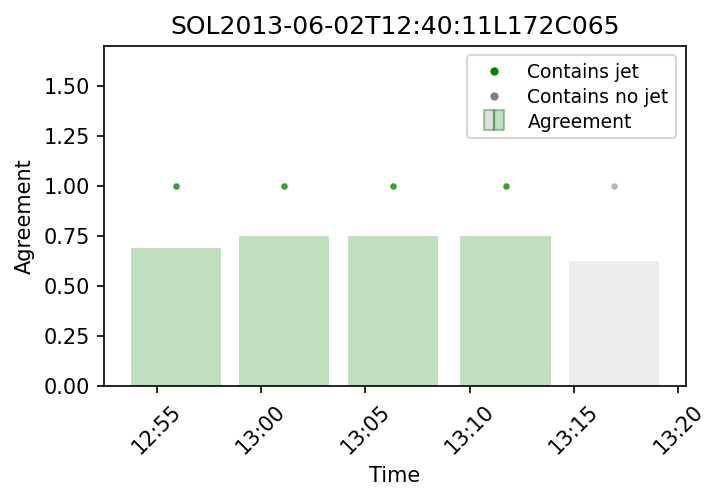

1142


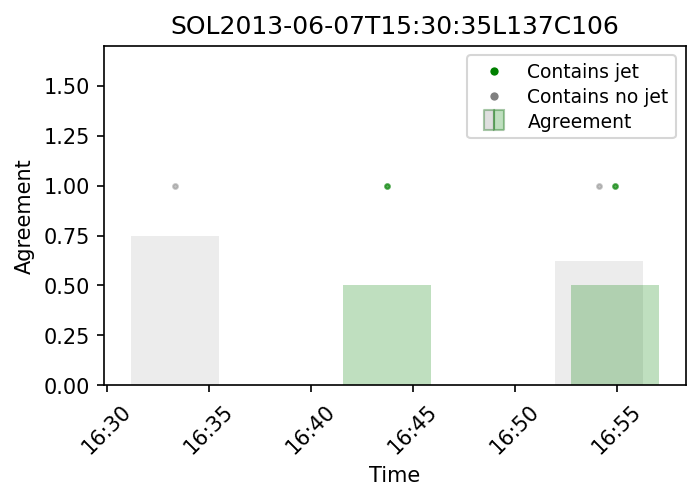

1146


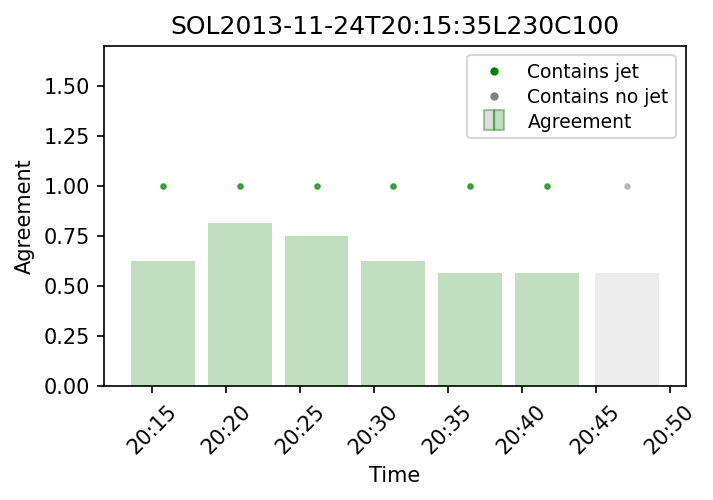

1153


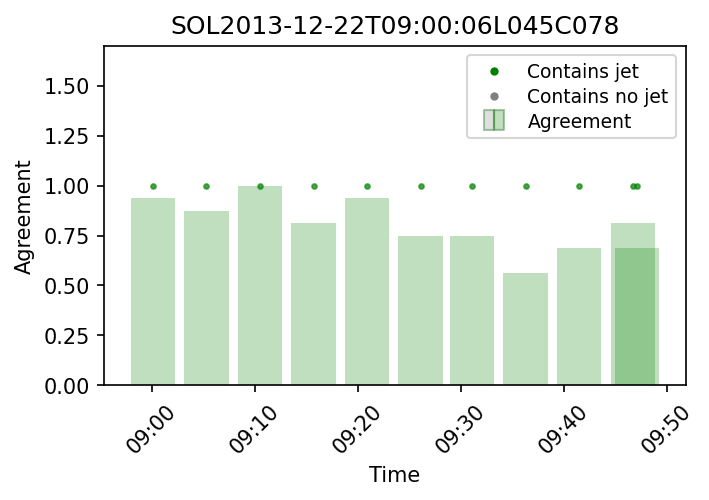

1164


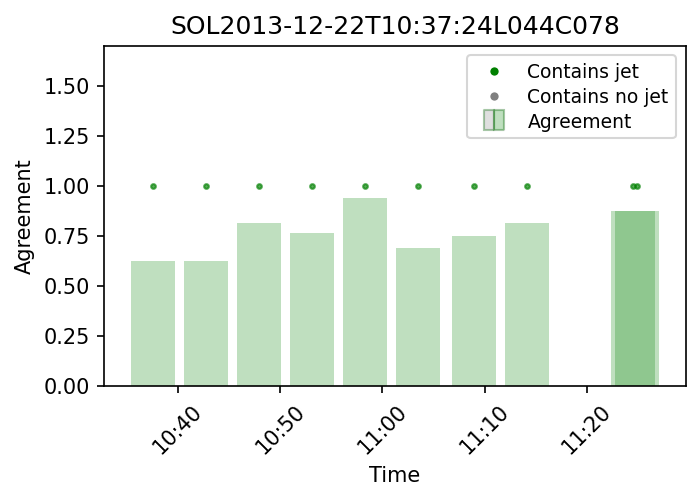

1174


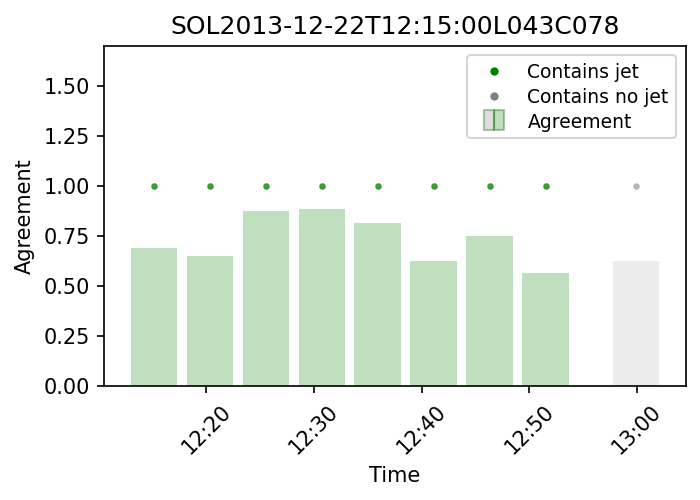

1183


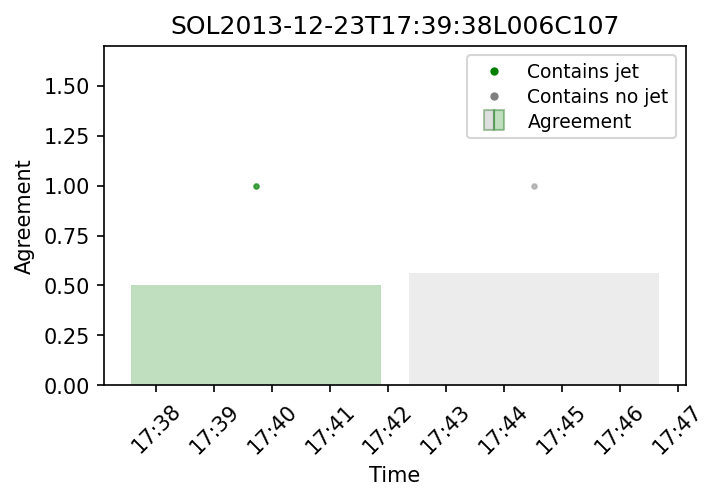

1185


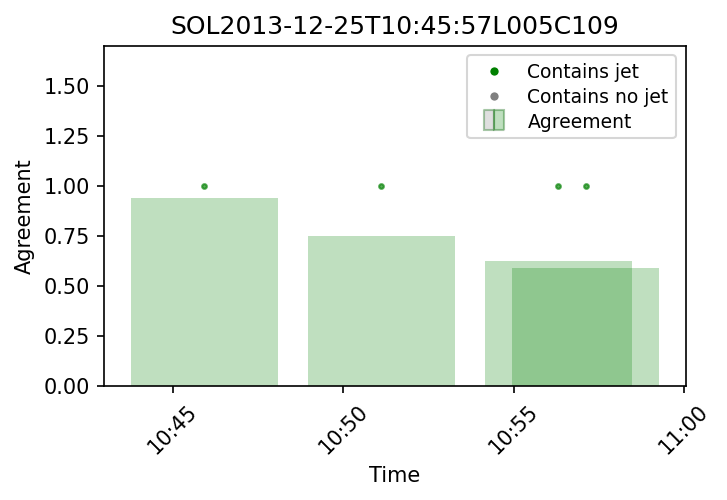

1189


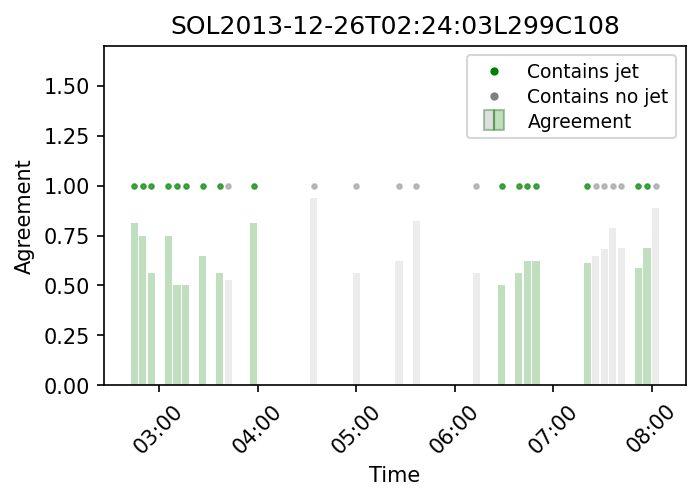

In [4]:
non_jet_mask=ans=='n'
jet_mask=ans=='y'
start_i=0
while start_i<len(subject_sol):
    I=subject_sol==subject_sol[start_i]
    print(start_i)

    fig, ax = plt.subplots(dpi=150,figsize=(5,3))
    try: 
        plt.bar(obs_time[non_jet_mask&I],agreement[non_jet_mask&I],width=0.003, alpha=0.15,color='grey')
        plt.scatter(obs_time[non_jet_mask&I],[1]*len(obs_time[non_jet_mask&I]),color="grey", alpha=0.45, s=5)
    except:
        print('happens') #Not printed so if only yes jets this try execept does not work breaking the plot
        pass

    try:
        plt.bar(obs_time[jet_mask&I],agreement[jet_mask&I],width=0.003, alpha=0.25,color='green')
        plt.scatter(obs_time[jet_mask&I],[1]*len(obs_time[jet_mask&I]),color="green", alpha=0.65, s=5)
    except:
        print('No jets in this event')

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.title(subject_sol[start_i])
    plt.xlabel('Time')
    plt.ylabel('Agreement')
    plt.ylim(0,1.7)
    #Legend
    d1 = Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=5)
    d2 = Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=5)
    m3, = ax.plot([], [], c='grey' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='left', linestyle='none')
    m4, = ax.plot([], [], c='green' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='right', linestyle='none')
    ax.legend(((d1),(d2), (m3, m4)), ('Contains jet', 'Contains no jet','Agreement'), numpoints=1, labelspacing=0.3,
          loc='upper right', fontsize=9)
    #
    plt.savefig('SOL/Agreement_SOL_T3/'+subject_sol[start_i].replace(':','-')+'.png',bbox_inches="tight")
    plt.show()
    start_i=np.max(np.where(I==True))+1
